<a href="https://colab.research.google.com/github/enzeeeh/ds-project/blob/main/ds-lab1/Text_Mining_Analysis_DS_LAB1_Topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT DATA SCIENCE LAB 1

### 0. Install and Import

In [1]:
# Import libs
import pandas as pd
import numpy as np
from datetime import datetime as dt
import re, string, unicodedata
string.punctuation
from time import time

# Libs for visualization
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import folium # map visualization
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import wordcloud
import pickle
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Text preprocessing
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
from nltk.util import ngrams
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Metrics, Clustering algorithms, Topic modeling, Dimensionality reduction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
from sklearn.pipeline import make_pipeline

#Performance metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances, calinski_harabasz_score, silhouette_score
from sklearn.metrics import davies_bouldin_score

import en_core_web_sm
nlp = en_core_web_sm.load()

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
# mount drive from the gdrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Load dataset
root_dir = '/content/drive/MyDrive/ds_lab_project/dataset/'

df1 = pd.read_excel(root_dir +'dataset.xlsx')
df2 = pd.read_excel(root_dir +'ENISA_skill_set.xlsx')

# Display the first few rows of the DataFrame
print(f"\nNumber of rows and columns in dataset: {df1.shape}")
print(f"\nNumber of rows and columns in dataset: {df2.shape}")


Number of rows and columns in dataset: (143, 7)

Number of rows and columns in dataset: (12, 7)


# 1. Exploratory Data Analysis

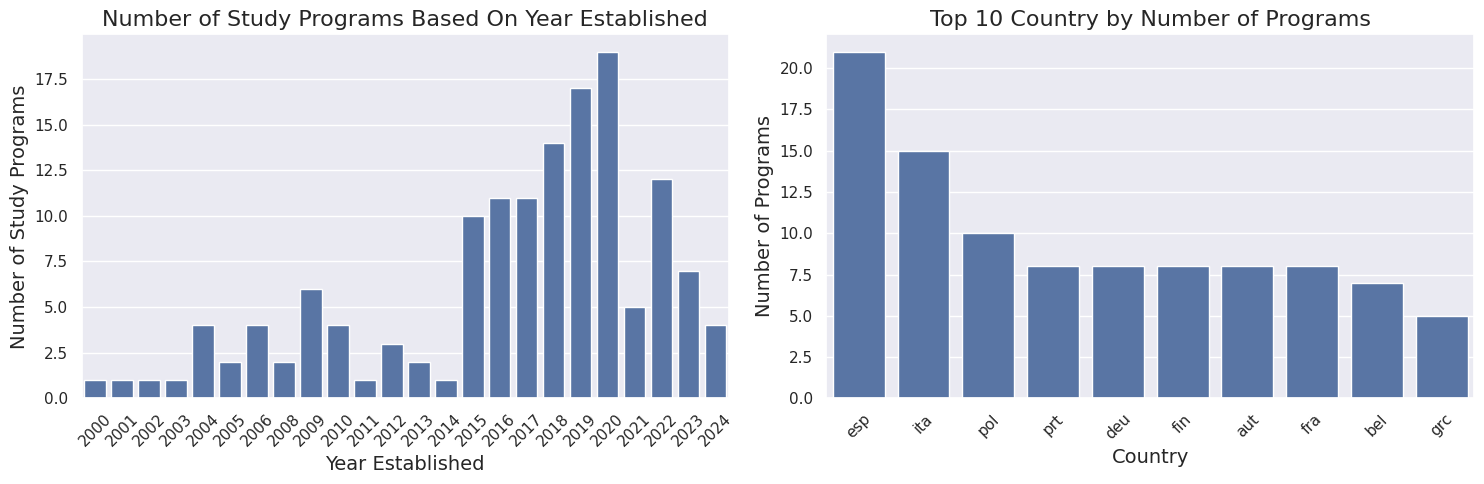

In [ ]:
# coordinate systems visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Bar chart for timeline of each year established
sns.countplot(
    x="year_established",
    data=df1,
    ax=axes[0]
)
axes[0].set_title("Number of Study Programs Based On Year Established", fontsize=16)
axes[0].set_xlabel("Year Established", fontsize=14)
axes[0].set_ylabel("Number of Study Programs", fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for country with the most number of programs
country_counts = df1["country"].value_counts().sort_values(ascending=False)
top_country = country_counts.head(10)

sns.barplot(
    x=top_country.index,
    y=top_country.values,
    ax=axes[1]
)
axes[1].set_title("Top 10 Country by Number of Programs", fontsize=16)
axes[1].set_xlabel("Country", fontsize=14)
axes[1].set_ylabel("Number of Programs", fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

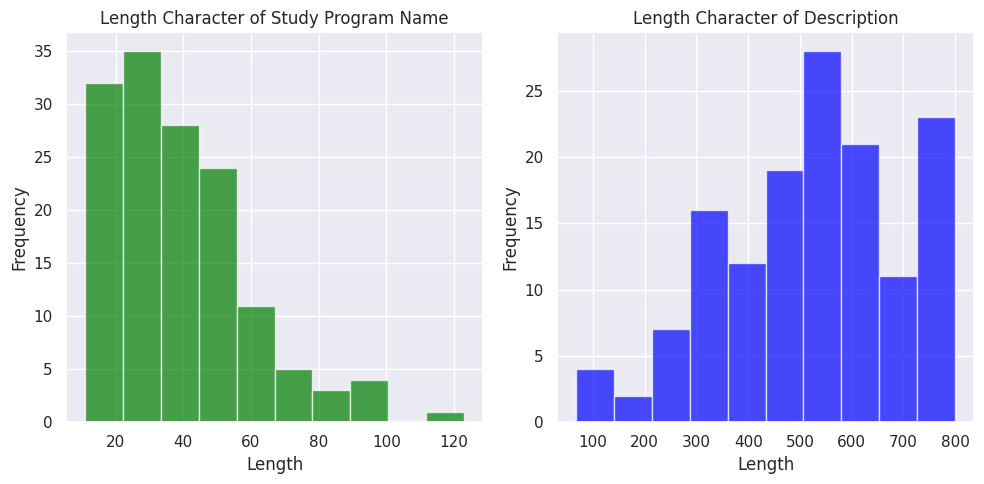

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Adjust figsize to fit your screen as necessary

axes[0].hist(df1['study_program_name'].str.len(), color='green', alpha=0.7)
axes[0].set_title('Length Character of Study Program Name')
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(df1['description'].str.len(), color='blue', alpha=0.7)
axes[1].set_title('Length Character of Description')
axes[1].set_xlabel('Length')
axes[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

The histogram shows that [Study Program Name] range from 10 to 120 characters and generally, it is between 20 to 55 characters. while [Description] range from 100 to 820 characters.

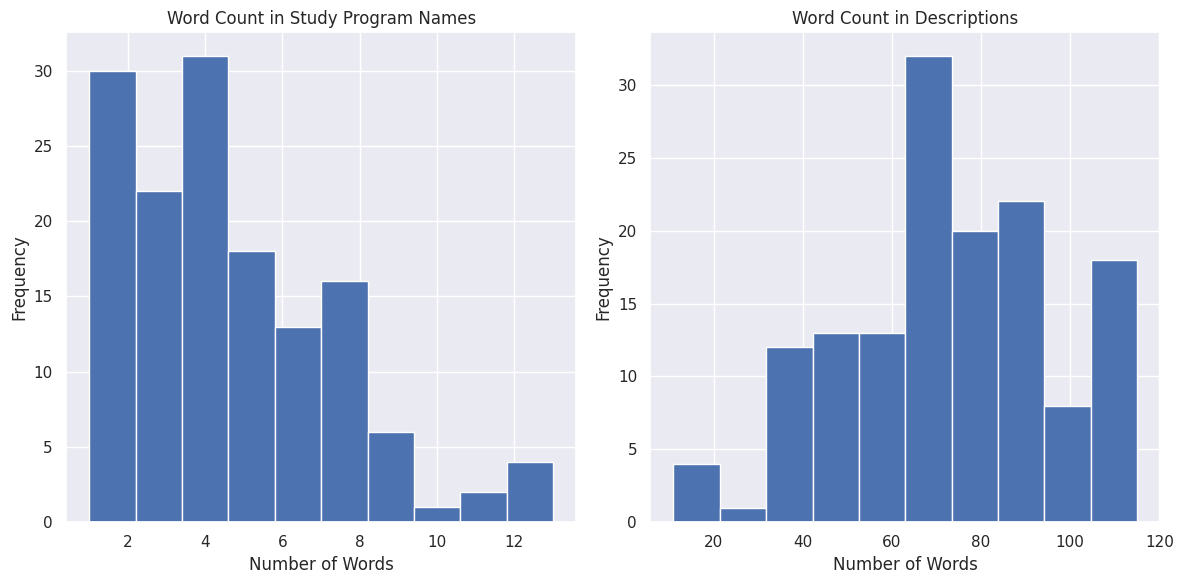

In [ ]:
def plot_word_number_histogram(text, ax):
    text.str.split().map(lambda x: len(x)).hist(ax=ax)
    ax.set_title('Histogram of Word Counts')
    ax.set_xlabel('Number of Words')
    ax.set_ylabel('Frequency')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plot_word_number_histogram(df1['study_program_name'], axes[0])
axes[0].set_title('Word Count in Study Program Names')
plot_word_number_histogram(df1['description'], axes[1])
axes[1].set_title('Word Count in Descriptions')
plt.tight_layout()
plt.show()

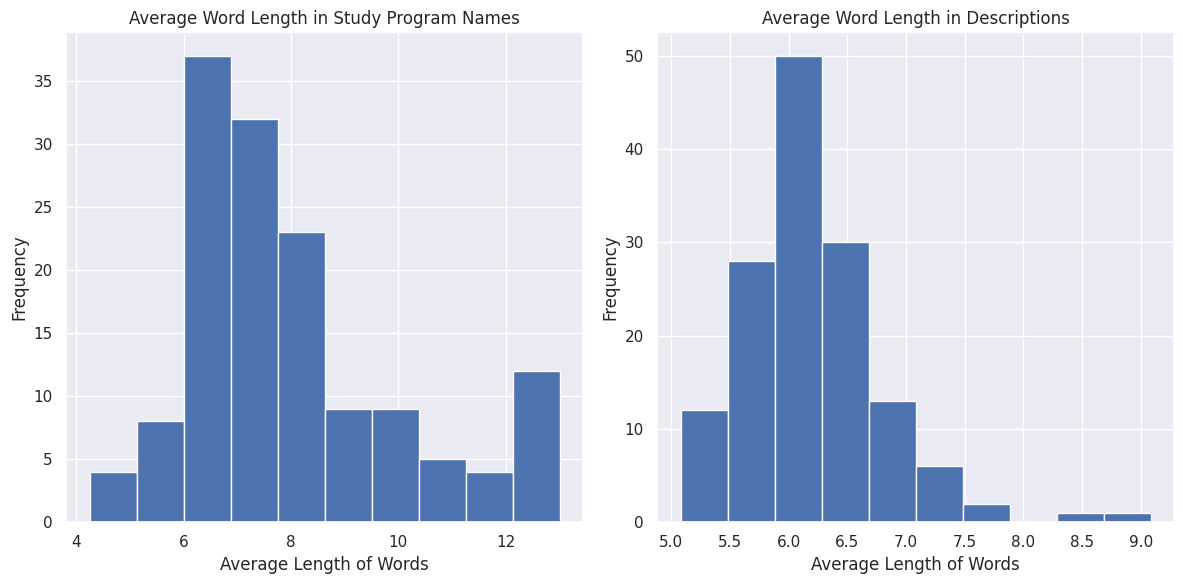

In [ ]:
def plot_word_length_histogram(text, ax):
    average_lengths = text.str.split().apply(lambda x: [len(i) for i in x]).map(np.mean)
    average_lengths.hist(ax=ax)
    ax.set_title('Histogram of Average Word Lengths')
    ax.set_xlabel('Average Length of Words')
    ax.set_ylabel('Frequency')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting in the first subplot for 'Study Program Name'
plot_word_length_histogram(df1['study_program_name'], axes[0])
axes[0].set_title('Average Word Length in Study Program Names')

# Plotting in the second subplot for 'Description'
plot_word_length_histogram(df1['description'], axes[1])
axes[1].set_title('Average Word Length in Descriptions')

plt.tight_layout()

plt.show()

In [4]:
study_program = df1[['study_program_name', 'description']]

In [5]:
skillset = df2[['profile_title','mission','main_tasks','key_skills','key_knowledge']]

## Text preprocessing is the practice of cleaning and preparing text data. This is one of the most crucial steps in the process.

Using NLTK, study program title and description are then pre-processed with the following:

**tokenization** — convert sentences to words converting the text to lower case

**stopwords removal** - frequent words which have not any semantic sense
removing punctuation, numerical values, some extra examples

**lemmatization** - convert the word into a root word
using WordNetLemmatizer in order to get correct word form based on the context

**vectorization** - numerically representation of text (tf-idf vectorization)

In [6]:
class TextPreprocessor:
    def __init__(self, study_program, skillset):
        self.study_program = study_program
        self.skillset = skillset
        self.lemmatizer = WordNetLemmatizer()
        self.nlp = nlp

    def get_wordnet_pos(self, word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    def clean_text(self, text):
        """Remove HTML tags, special characters, numbers, and multiple spaces, then lowercase"""
        text = re.sub(r'<[^<>]*>', '', text)
        text = re.sub(r'[^\w\s]|[\d]', '', text)
        text = re.sub(r'\s+', ' ', text).strip().lower()
        return text

    def preprocess(self, df, columns):
        """Apply cleaning and tokenizing"""
        for col in columns:
            df[f'preprocessing_{col}'] = df[col].apply(self.clean_text)
            df[f'preprocessing_{col}'] = df[f'preprocessing_{col}'].apply(lambda x: self.nlp(x))
            df[f'clean_tokens_{col}'] = df[f'preprocessing_{col}'].apply(
                lambda x: [self.lemmatizer.lemmatize(token.text, self.get_wordnet_pos(token.text)) for token in x if token.text not in STOP_WORDS])
        return df

    def combine_skills(self):
        """Combine skill, mission, tasks, knowledge into one list of tokens"""
        combined_columns = ['clean_tokens_mission', 'clean_tokens_main_tasks', 'clean_tokens_key_skills', 'clean_tokens_key_knowledge']
        self.skillset['clean_combined_token_skill'] = self.skillset[combined_columns].apply(lambda row: sum(row, []), axis=1)

    def execute(self):
        study_columns = ['study_program_name', 'description']
        skill_columns = ['profile_title', 'mission', 'main_tasks', 'key_skills', 'key_knowledge']

        self.study_program = self.preprocess(self.study_program, study_columns)
        self.skillset = self.preprocess(self.skillset, skill_columns)

        for col in study_columns:
            self.study_program[f'clean_document_{col}'] = self.study_program[f'clean_tokens_{col}'].apply(lambda x: " ".join(x))

        self.skillset['clean_document_profile_title'] = self.skillset['clean_tokens_profile_title'].apply(lambda x: " ".join(x))

        self.combine_skills()
        self.skillset['token_count_combined_skill'] = self.skillset['clean_combined_token_skill'].apply(len)
        self.skillset['clean_document_combined_skill'] = self.skillset['clean_combined_token_skill'].apply(lambda tokens: " ".join(tokens))

        return self.study_program, self.skillset

In [7]:
preprocessor = TextPreprocessor(study_program, skillset)
study_program_cleaned, skillset_cleaned = preprocessor.execute()

In [8]:
study_program_cleaned.head(2)

,study_program_name,description,preprocessing_study_program_name,clean_tokens_study_program_name,preprocessing_description,clean_tokens_description,clean_document_study_program_name,clean_document_description
0,Cybersecurity Engineering,"Brand new study program, with focus on industr...","(cybersecurity, engineering)","[cybersecurity, engineering]","(brand, new, study, program, with, focus, on, ...","[brand, new, study, program, focus, industrial...",cybersecurity engineering,brand new study program focus industrial secur...
1,Cyber Security Management,The study concept offers problem-based learnin...,"(cyber, security, management)","[cyber, security, management]","(the, study, concept, offers, problembased, le...","[study, concept, offer, problembased, learn, f...",cyber security management,study concept offer problembased learn form le...


In [ ]:
skillset_cleaned.head(2)

,profile_title,mission,main_tasks,key_skills,key_knowledge,preprocessing_profile_title,clean_tokens_profile_title,preprocessing_mission,clean_tokens_mission,preprocessing_main_tasks,clean_tokens_main_tasks,preprocessing_key_skills,clean_tokens_key_skills,preprocessing_key_knowledge,clean_tokens_key_knowledge,clean_document_profile_title,clean_combined_token_skill,token_count_combined_skill,clean_document_combined_skill
0,Chief Information Security Officer (CISO),"Defines, maintains and communicates the cybers...","Define, implement, communicate and maintain c...",Assess and enhance an organisation’s cybersec...,Cybersecurity policies Cybersecurity standar...,"(chief, information, security, officer, ciso)","[chief, information, security, officer, ciso]","(defines, maintains, and, communicates, the, c...","[defines, maintains, communicates, cybersecuri...","(define, implement, communicate, and, maintain...","[define, implement, communicate, maintain, cyb...","(assess, and, enhance, an, organisations, cybe...","[ass, enhance, organisation, cybersecurity, po...","(cybersecurity, policies, cybersecurity, stand...","[cybersecurity, policy, cybersecurity, standar...",chief information security officer ciso,"[defines, maintains, communicates, cybersecuri...",245,defines maintains communicates cybersecurity v...
1,Cyber Incident Responder,Monitors and assesses systems’ cybersecurity s...,Cybersecurity policies Cybersecurity standar...,"Practice all technical, functional and operat...","Incident handling standards, methodologies an...","(cyber, incident, responder)","[cyber, incident, responder]","(monitors, and, assesses, systems, cybersecuri...","[monitor, ass, system, cybersecurity, state, a...","(cybersecurity, policies, cybersecurity, stand...","[cybersecurity, policy, cybersecurity, standar...","(practice, all, technical, functional, and, op...","[practice, technical, functional, operational,...","(incident, handling, standards, methodologies,...","[incident, handle, standard, methodology, fram...",cyber incident responder,"[monitor, ass, system, cybersecurity, state, a...",155,monitor ass system cybersecurity state analysi...


# Top Keyword for the SKILL SET ENISA with TFIDF and NMF Model

In [ ]:
# Adjusting TF-IDF parameters
vectorizer = TfidfVectorizer()
skill_tfidf = vectorizer.fit_transform(skillset['clean_document_combined_skill'])

# NMF for topic modeling with more components
skill_nmf_model = NMF(n_components=12, random_state=42)
skill_nmf_matrix = skill_nmf_model.fit_transform(skill_tfidf)

# Get top keywords for each topic
def get_top_keywords(model, feature_names, top_n=10):
    keywords = []
    for topic_idx, topic in enumerate(model.components_):
        keywords.append([feature_names[i] for i in topic.argsort()[:-top_n - 1:-1]])
    return keywords

# Extract feature names and top keywords
skill_feature_names = vectorizer.get_feature_names_out()
skill_top_keywords = get_top_keywords(skill_nmf_model, skill_feature_names)

# Display top keywords for each profile
for idx, title in enumerate(skillset['profile_title']):
    print(f"Profile: {title}")
    print(f"Skill Top Keywords: {', '.join(skill_top_keywords[idx])}\n")

Profile: Chief Information Security Officer (CISO)
Skill Top Keywords: risk, management, cybersecurity, organisation, asset, control, level, remain, acceptable, option

Profile: Cyber Incident Responder
Skill Top Keywords: penetration, test, vulnerability, technical, procedure, system, identify, security, attack, code

Profile: Cyber Legal, Policy & Compliance Officer
Skill Top Keywords: audit, conformity, standard, compliance, control, methodology, framework, legal, independent, applicable

Profile: Cyber Threat Intelligence Specialist
Skill Top Keywords: data, protection, privacy, legal, compliance, policy, cybersecurity, strategy, ensure, organisation

Profile: Cybersecurity Architect
Skill Top Keywords: digital, forensics, investigation, evidence, preserve, analysis, procedure, qualitative, finding, analyse

Profile: Cybersecurity Auditor
Skill Top Keywords: intelligence, threat, cyber, actor, ttps, actionable, tactic, cti, procedure, level

Profile: Cybersecurity Educator
Skill To

In [ ]:
# Create a DataFrame to store profile titles and their corresponding top keywords
top_keywords_per_profile = []
for idx, title in enumerate(skillset_cleaned['profile_title']):
    top_keywords_per_profile.append({
        "profile_title": title,
        "skill_top_keywords": ", ".join(skill_top_keywords[idx])
    })

# Convert the list of dictionaries to a DataFrame
top_keywords_df = pd.DataFrame(top_keywords_per_profile)

# Display the DataFrame
top_keywords_df

,profile_title,skill_top_keywords
0,Chief Information Security Officer (CISO),"risk, management, cybersecurity, organisation,..."
1,Cyber Incident Responder,"penetration, test, vulnerability, technical, p..."
2,"Cyber Legal, Policy & Compliance Officer","audit, conformity, standard, compliance, contr..."
3,Cyber Threat Intelligence Specialist,"data, protection, privacy, legal, compliance, ..."
4,Cybersecurity Architect,"digital, forensics, investigation, evidence, p..."
5,Cybersecurity Auditor,"intelligence, threat, cyber, actor, ttps, acti..."
6,Cybersecurity Educator,"architecture, cybersecurity, specification, ar..."
7,Cybersecurity Implementer,"innovation, research, cybersecurity, solution,..."
8,Cybersecurity Researcher,"incident, handle, cybersecurity, response, ope..."
9,Cybersecurity Risk Manager,"training, cybersecurity, education, deliver, a..."


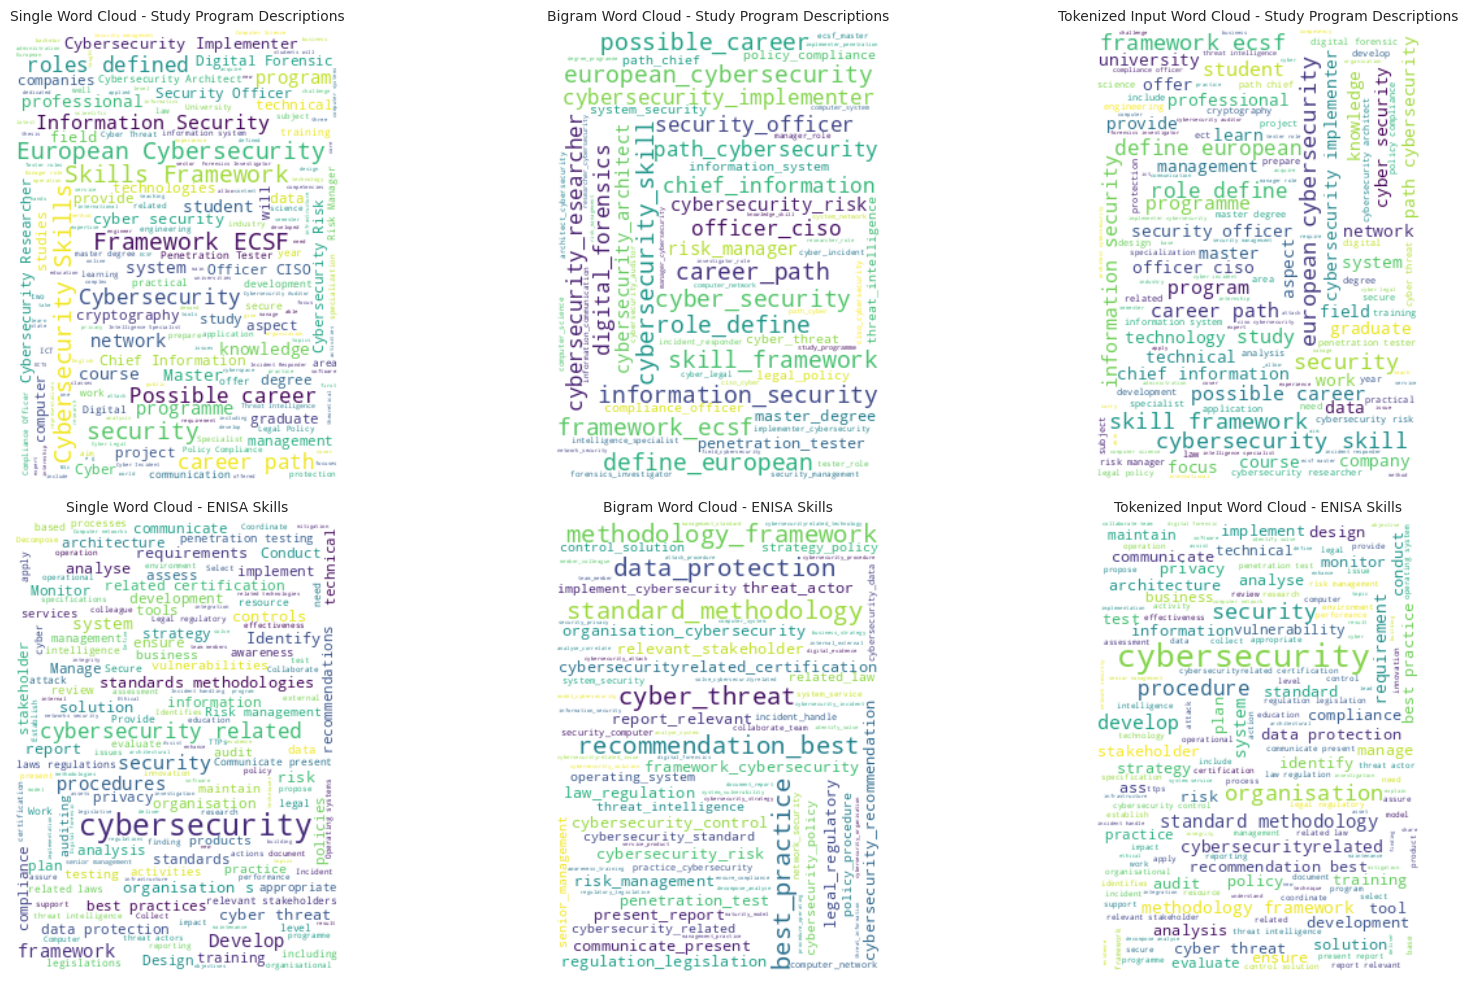

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Function to generate word cloud
def generate_word_cloud(text, max_words=200):
    wordcloud = WordCloud(width=250, height=350, background_color='white', max_words=max_words).generate(text)
    return wordcloud

# Function to generate bigrams
def generate_bigrams(text):
    tokens = preprocess_text(text)
    bigrams = list(nltk.bigrams(tokens))
    bigram_freq = Counter(bigrams)
    return ' '.join(['_'.join(bigram) for bigram, freq in bigram_freq.most_common(200)])

# Combine text data for single word cloud
study_program_description_text = ' '.join(study_program_cleaned['description'])
combined_skill_text = ' '.join(skillset_cleaned['mission'] + skillset_cleaned['main_tasks'] + skillset_cleaned['key_skills'] + skillset_cleaned['key_knowledge'])

# Combine text data for bigram and tokenized input word cloud
study_program_clean_description_text = ' '.join(study_program_cleaned['clean_document_description'])
combined_skill_clean_text = ' '.join(skillset_cleaned['clean_document_combined_skill'])

# Prepare data for word clouds
data_fields = [
    ("Study Program Descriptions", study_program_description_text, study_program_clean_description_text),
    ("ENISA Skills", combined_skill_text, combined_skill_clean_text)
]

# Create subplots for each text field
fig, axes = plt.subplots(len(data_fields), 3, figsize=(18, 5 * len(data_fields)))

for i, (title, single_text, clean_text) in enumerate(data_fields):
    # Single Word Cloud
    wordcloud_single = generate_word_cloud(single_text)
    axes[i, 0].imshow(wordcloud_single, interpolation='bilinear')
    axes[i, 0].set_title(f'Single Word Cloud - {title}', fontsize=10)
    axes[i, 0].axis('off')

    # Bigram Word Cloud
    bigrams_text = generate_bigrams(clean_text)
    wordcloud_bigrams = generate_word_cloud(bigrams_text)
    axes[i, 1].imshow(wordcloud_bigrams, interpolation='bilinear')
    axes[i, 1].set_title(f'Bigram Word Cloud - {title}', fontsize=10)
    axes[i, 1].axis('off')

    # Tokenized Input Word Cloud
    tokenized_text = ' '.join(preprocess_text(clean_text))
    wordcloud_tokens = generate_word_cloud(tokenized_text)
    axes[i, 2].imshow(wordcloud_tokens, interpolation='bilinear')
    axes[i, 2].set_title(f'Tokenized Input Word Cloud - {title}', fontsize=10)
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

# Text clustering: TF-IDF + dimensionality reduction + clustering algorithms

In this project I use TF-IDF Vectorization (Term Frequency - Inverse Document Frequency)

Term Frequency (TF): This summarizes how often a given word appears within a document

Inverse Document Frequency (IDF): This downscales the words that appear a lot across documents.

TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus.



### Vectorize Program Description and Skill Set separately with TF-IDF

In [141]:
# Vectorization descriptions and skills using TF/IDF
tfidf_vectorizer = TfidfVectorizer()
skill_tfidf = tfidf_vectorizer.fit_transform(skillset['clean_document_combined_skill'])
program_tfidf = tfidf_vectorizer.fit_transform(study_program['clean_document_description'])
words = tfidf_vectorizer.get_feature_names_out()
print(skill_tfidf.shape)
print(program_tfidf.shape)
print(len(words))

(12, 566)
(143, 1222)
1222


### Vectorize Combining Program Description and Skill Set with TF-IDF

In [142]:
# Combine descriptions and skills for TF-IDF vectorization
combined_texts = pd.concat([study_program['clean_document_description'], skillset['clean_document_combined_skill']], ignore_index=True)

In [143]:
# Vectorize the combine text of descriptions and skills using TF-IDF
vectorizer = TfidfVectorizer()
combined_text_tfidf = vectorizer.fit_transform(combined_texts)
word_features = vectorizer.get_feature_names_out()
print(combined_text_tfidf.shape)
print(len(word_features))

(155, 1472)
1472


### Finding the optimal value for the n_component on the Dimensional Reduction

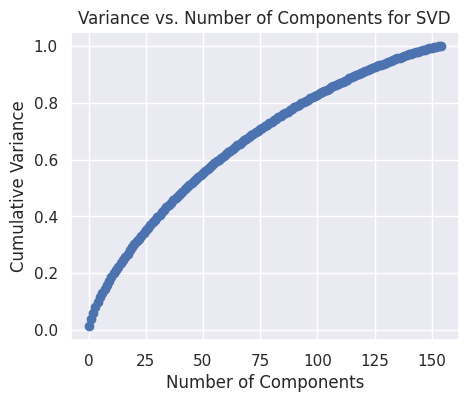


Optimal number of components for SVD: 134


In [ ]:
# Fit SVD on the TF-IDF matrix
svd = TruncatedSVD(n_components=combined_text_tfidf.shape[1] - 1)
svd.fit(combined_text_tfidf)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(5, 4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Variance vs. Number of Components for SVD')
plt.grid(True)
plt.show()

# Choose the number of components that explain a desired threshold of variance (e.g., 95%)
optimal_n_components_svd = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nOptimal number of components for SVD: {optimal_n_components_svd}")

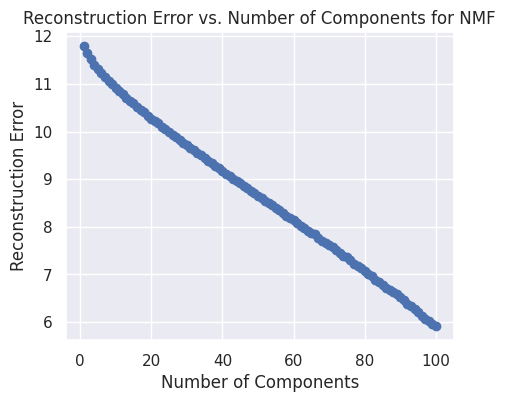

Optimal number of components for NMF: 66


In [ ]:
# Initialize lists to store reconstruction errors
errors = []

# Test different numbers of components
for n in range(1, 101):  # Adjust the range as needed
    nmf = NMF(n_components=n, init='random', random_state=42)
    W = nmf.fit_transform(combined_text_tfidf)
    H = nmf.components_
    reconstruction = np.dot(W, H)
    error = np.linalg.norm(combined_text_tfidf - reconstruction)
    errors.append(error)

# Plot reconstruction error
plt.figure(figsize=(5, 4))
plt.plot(range(1, 101), errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Components for NMF')
plt.grid(True)
plt.show()

# Choose the number of components at the "elbow" of the curve
optimal_n_components_nmf = np.argmin(np.gradient(np.gradient(errors))) + 1
print(f"Optimal number of components for NMF: {optimal_n_components_nmf}")

### Set the Optimal Number N_COMPONENT for Dimensional Reduction

###From combined program description and skill set

In [147]:
# Using SVD
svd_combined = TruncatedSVD(n_components=4) # optimal n component = 134, using 10, the plot also not visible.
reduced_matrix_svd = svd_combined.fit_transform(combined_text_tfidf)

# Using NMF
# optimal n component = 66 the plot not visible when used by KMeans but with 2 component only, the plot is visible
# if we use higher value the number after transform will be close to 0.
# with only 2 the representation of the KMeans is understandable, if we use 10 or more the plot are not recognizeable
nmf_combined = NMF(n_components=2)
reduced_matrix_nmf = nmf_combined.fit_transform(combined_text_tfidf)

In [148]:
# Separate the reduced matrices for study programs and skill sets
programs_matrix_svd = reduced_matrix_svd[:len(study_program)]
skills_matrix_svd = reduced_matrix_svd[len(study_program):]
print(programs_matrix_svd.shape)
print(skills_matrix_svd.shape)
# Calculate cosine similarity for SVD
similarity_matrix_svd = cosine_similarity(programs_matrix_svd, skills_matrix_svd)

(143, 4)
(12, 4)


In [149]:
# Calculate cosine similarity for NMF
programs_matrix_nmf = reduced_matrix_nmf[:len(study_program)]
skills_matrix_nmf = reduced_matrix_nmf[len(study_program):]
print(programs_matrix_nmf.shape)
print(skills_matrix_nmf.shape)
similarity_matrix_nmf = cosine_similarity(programs_matrix_nmf, skills_matrix_nmf)

(143, 2)
(12, 2)


### From separated program description and skill sets

In [150]:
# Using SVD and calculate cosine similarity
svd_separated = TruncatedSVD(n_components=4)
program_matrix_svd_separated = svd_separated.fit_transform(program_tfidf)
skill_matrix_svd_separated = svd_separated.fit_transform(skill_tfidf)
print("program_matrix_svd_separated :",program_matrix_svd_separated.shape)
print("skill_matrix_svd_separated :",skill_matrix_svd_separated.shape)
similarity_matrix_svd_separate = cosine_similarity(program_matrix_svd_separated, skill_matrix_svd_separated)

# Using NMF and calculate cosine similarity
nmf_separated = NMF(n_components=2)
program_matrix_nmf_separated = nmf_separated.fit_transform(program_tfidf)
skill_matrix_nmf_separated = nmf_separated.fit_transform(skill_tfidf)
print("program_matrix_nmf_separated :",program_matrix_nmf_separated.shape)
print("skill_matrix_nmf_separated :",skill_matrix_nmf_separated.shape)
similarity_matrix_nmf_separate = cosine_similarity(program_matrix_nmf_separated, skill_matrix_nmf_separated)


program_matrix_svd_separated : (143, 4)
skill_matrix_svd_separated : (12, 4)
program_matrix_nmf_separated : (143, 2)
skill_matrix_nmf_separated : (12, 2)


### Result of Optimal N Cluster for SVD - KMeans - TF+IDF

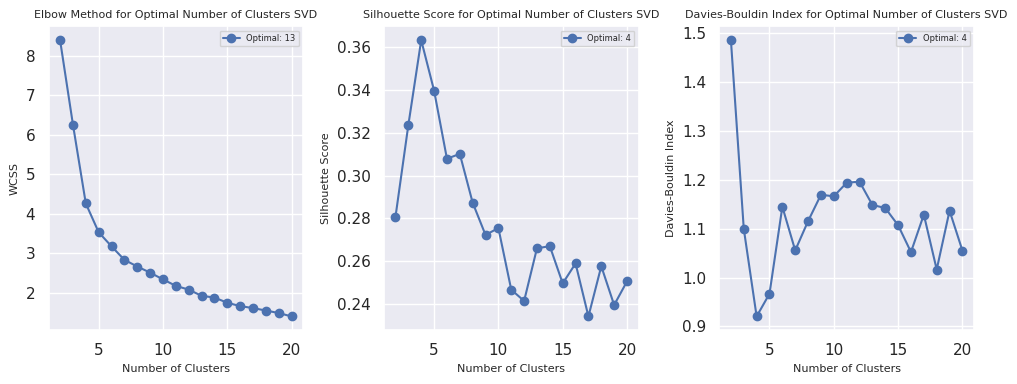

In [ ]:
# Initialize the WCSS list
wcss = []

# Range of number of clusters to test
cluster_range = range(2, 21)

# Compute WCSS for different number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_matrix_svd)  # Use reduced_matrix_nmf or reduced_matrix_svd
    wcss.append(kmeans.inertia_)

# Identify the elbow point programmatically
def find_elbow_point(wcss):
    # Calculate the second derivative of the WCSS
    second_derivative = np.diff(np.diff(wcss))
    elbow_point = np.argmin(second_derivative) + 2
    return elbow_point

# Find the optimal number of clusters
optimal_n_clusters_elbow = find_elbow_point(wcss)

# Initialize the silhouette scores list
silhouette_scores = []

# Compute silhouette score for different number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_matrix_svd)  # Use reduced_matrix_nmf or reduced_matrix_svd
    score = silhouette_score(reduced_matrix_svd, cluster_labels)
    silhouette_scores.append(score)

# Determine the optimal number of clusters
optimal_n_clusters_silhouette = cluster_range[np.argmax(silhouette_scores)]

# Initialize the Davies-Bouldin index list
db_indices = []

# Compute Davies-Bouldin index for different number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_matrix_svd)  # Use reduced_matrix_nmf or reduced_matrix_svd
    score = davies_bouldin_score(reduced_matrix_svd, cluster_labels)
    db_indices.append(score)

# Determine the optimal number of clusters based on Davies-Bouldin index
optimal_n_clusters_db = cluster_range[np.argmin(db_indices)]

# Plot the Elbow Method, Silhouette Score, and Davies-Bouldin index graphs side by side
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# Plot Elbow Method
ax[0].plot(cluster_range, wcss, marker='o', label=f'Optimal: {optimal_n_clusters_elbow}')
ax[0].set_xlabel('Number of Clusters', fontsize=8)
ax[0].set_ylabel('WCSS', fontsize=8)
ax[0].set_title('Elbow Method for Optimal Number of Clusters SVD', fontsize=8)
ax[0].legend(fontsize=6)
ax[0].grid(True)

# Plot Silhouette Scores
ax[1].plot(cluster_range, silhouette_scores, marker='o', label=f'Optimal: {optimal_n_clusters_silhouette}')
ax[1].set_xlabel('Number of Clusters', fontsize=8)
ax[1].set_ylabel('Silhouette Score', fontsize=8)
ax[1].set_title('Silhouette Score for Optimal Number of Clusters SVD', fontsize=8)
ax[1].legend(fontsize=6)
ax[1].grid(True)

# Plot Davies-Bouldin Index
ax[2].plot(cluster_range, db_indices, marker='o', label=f'Optimal: {optimal_n_clusters_db}')
ax[2].set_xlabel('Number of Clusters', fontsize=8)
ax[2].set_ylabel('Davies-Bouldin Index', fontsize=8)
ax[2].set_title('Davies-Bouldin Index for Optimal Number of Clusters SVD', fontsize=8)
ax[2].legend(fontsize=6)
ax[2].grid(True)

plt.tight_layout()
plt.show()

### Result of Optimal N Cluster for NMF - KMeans - TF+IDF

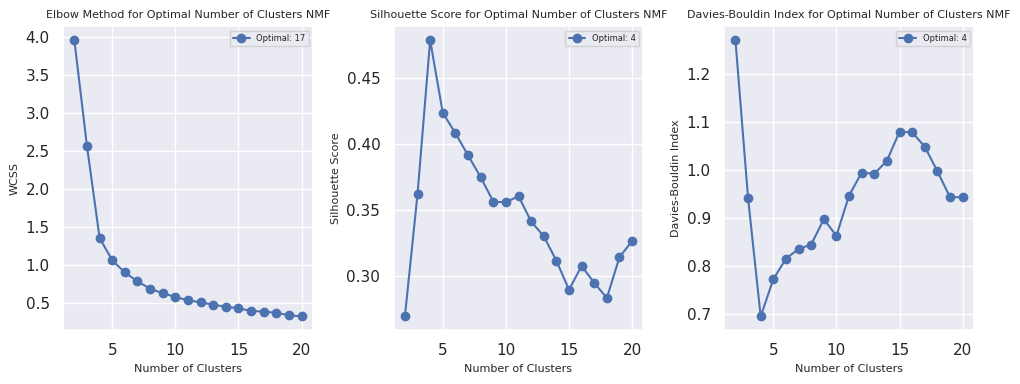

In [ ]:
# Initialize the WCSS list
wcss = []

# Range of number of clusters to test
cluster_range = range(2, 21)

# Compute WCSS for different number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_matrix_nmf)  # Use reduced_matrix_nmf or reduced_matrix_svd
    wcss.append(kmeans.inertia_)

# Identify the elbow point programmatically
def find_elbow_point(wcss):
    # Calculate the second derivative of the WCSS
    second_derivative = np.diff(np.diff(wcss))
    elbow_point = np.argmin(second_derivative) + 2
    return elbow_point

# Find the optimal number of clusters
optimal_n_clusters_elbow = find_elbow_point(wcss)

# Initialize the silhouette scores list
silhouette_scores = []

# Compute silhouette score for different number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_matrix_nmf)  # Use reduced_matrix_nmf or reduced_matrix_svd
    score = silhouette_score(reduced_matrix_nmf, cluster_labels)
    silhouette_scores.append(score)

# Determine the optimal number of clusters
optimal_n_clusters_silhouette = cluster_range[np.argmax(silhouette_scores)]

# Initialize the Davies-Bouldin index list
db_indices = []

# Compute Davies-Bouldin index for different number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_matrix_nmf)  # Use reduced_matrix_nmf or reduced_matrix_svd
    score = davies_bouldin_score(reduced_matrix_nmf, cluster_labels)
    db_indices.append(score)

# Determine the optimal number of clusters based on Davies-Bouldin index
optimal_n_clusters_db = cluster_range[np.argmin(db_indices)]

# Plot the Elbow Method, Silhouette Score, and Davies-Bouldin index graphs side by side
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

# Plot Elbow Method
ax[0].plot(cluster_range, wcss, marker='o', label=f'Optimal: {optimal_n_clusters_elbow}')
ax[0].set_xlabel('Number of Clusters', fontsize=8)
ax[0].set_ylabel('WCSS', fontsize=8)
ax[0].set_title('Elbow Method for Optimal Number of Clusters NMF', fontsize=8)
ax[0].legend(fontsize=6)
ax[0].grid(True)

# Plot Silhouette Scores
ax[1].plot(cluster_range, silhouette_scores, marker='o', label=f'Optimal: {optimal_n_clusters_silhouette}')
ax[1].set_xlabel('Number of Clusters', fontsize=8)
ax[1].set_ylabel('Silhouette Score', fontsize=8)
ax[1].set_title('Silhouette Score for Optimal Number of Clusters NMF', fontsize=8)
ax[1].legend(fontsize=6)
ax[1].grid(True)

# Plot Davies-Bouldin Index
ax[2].plot(cluster_range, db_indices, marker='o', label=f'Optimal: {optimal_n_clusters_db}')
ax[2].set_xlabel('Number of Clusters', fontsize=8)
ax[2].set_ylabel('Davies-Bouldin Index', fontsize=8)
ax[2].set_title('Davies-Bouldin Index for Optimal Number of Clusters NMF', fontsize=8)
ax[2].legend(fontsize=6)
ax[2].grid(True)

plt.tight_layout()
plt.show()

### Perform the K-means clustering on SVD and NMF reduced matrix with 12 Cluster

In [151]:
# Perform K-means clustering on SVD reduced matrix
# the reason I am using 12 cluster because the skill set have 12 type of different skill. so I am using it to cluster the study program with it.
kmeans_svd = KMeans(n_clusters=12, random_state=42)
clusters_svd = kmeans_svd.fit_predict(programs_matrix_svd)

# Perform K-means clustering on NMF reduced matrix
kmeans_nmf = KMeans(n_clusters=12, random_state=42)
clusters_nmf = kmeans_nmf.fit_predict(programs_matrix_nmf)

In [152]:
# Perform K-means clustering on skill sets using SVD reduced matrix
skill_clusters_svd = kmeans_svd.predict(skills_matrix_svd)

# Perform K-means clustering on skill sets using NMF reduced matrix
skill_clusters_nmf = kmeans_nmf.predict(skills_matrix_nmf)

### Perform the K-means clustering on SVD and NMF reduced matrix with 12 Cluster On Separate Program Description and Skill Role

In [153]:
# Perform K-means clustering on SVD reduced matrix
# the reason I am using 12 cluster because the skill set have 12 type of different skill. so I am using it to cluster the study program with it.
kmeans_svd = KMeans(n_clusters=12, random_state=42)
clusters_svd_separated = kmeans_svd.fit_predict(program_matrix_svd_separated)

# Perform K-means clustering on NMF reduced matrix
kmeans_nmf = KMeans(n_clusters=12, random_state=42)
clusters_nmf_separated = kmeans_nmf.fit_predict(program_matrix_nmf_separated)

In [154]:
# Perform K-means clustering on skill sets using SVD reduced matrix
skill_clusters_svd_separated = kmeans_svd.predict(skill_matrix_svd_separated)

# Perform K-means clustering on skill sets using NMF reduced matrix
skill_clusters_nmf_separated = kmeans_nmf.predict(skill_matrix_nmf_separated)

### Plotting the Cluster

In [118]:
class ClusteringPlot:
    def __init__(self, dfs, centroids, titles, xlabels, ylabels):
        self.dfs = dfs
        self.centroids = centroids
        self.titles = titles
        self.xlabels = xlabels
        self.ylabels = ylabels

    def plot(self):
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=self.titles,
            vertical_spacing=0.08,  # Reduce vertical spacing
            horizontal_spacing=0.1
        )

        for i in range(len(self.dfs)):
            df = self.dfs[i]
            centroid = self.centroids[i]
            scatter = px.scatter(
                df,
                x=df.columns[1],
                y=df.columns[2],
                color='Cluster Name',
                hover_data=['Program']
            ).data

            for trace in scatter:
                trace.showlegend = i == 0  # Show legend for the first subplot only
                fig.add_trace(trace, row=(i // 2) + 1, col=(i % 2) + 1)

            # Add centroids to the plot
            for c in centroid:
                fig.add_trace(go.Scatter(
                    x=[c[0]],
                    y=[c[1]],
                    mode='markers',
                    marker=dict(color='black', size=5, symbol='x'),
                    showlegend=False
                ), row=(i // 2) + 1, col=(i % 2) + 1)

            fig.update_xaxes(title_text=self.xlabels[i], row=(i // 2) + 1, col=(i % 2) + 1)
            fig.update_yaxes(title_text=self.ylabels[i], row=(i // 2) + 1, col=(i % 2) + 1)

        # Update the layout for subplot title font size
        fig.update_layout(
            height=800,
            width=800,
            title_text="Clustering Plots",
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            font=dict(size=8)  # Set font size for subplot titles
        )

        # Manually update the subplot titles font size
        for annotation in fig['layout']['annotations']:
            annotation['font'] = dict(size=8)

        return fig

In [155]:
# Rename clusters to profile names
cluster_names = {i: name for i, name in enumerate(skillset_cleaned['profile_title'])}

# Calculate centroids for SVD and NMF
centroids_svd = kmeans_svd.cluster_centers_
centroids_nmf = kmeans_nmf.cluster_centers_

# Calculate centroids for SVD and NMF
centroids_svd_separated = kmeans_svd.cluster_centers_
centroids_nmf_separated = kmeans_nmf.cluster_centers_

df_programs_svd = pd.DataFrame({
    'Program': study_program_cleaned['study_program_name'],
    'SVD1': programs_matrix_svd[:, 0],
    'SVD2': programs_matrix_svd[:, 1],
    'Cluster': clusters_svd
})
df_programs_svd['Cluster Name'] = df_programs_svd['Cluster'].map(cluster_names)

df_programs_nmf = pd.DataFrame({
    'Program': study_program_cleaned['study_program_name'],
    'NMF1': programs_matrix_nmf[:, 0],
    'NMF2': programs_matrix_nmf[:, 1],
    'Cluster': clusters_nmf
})
df_programs_nmf['Cluster Name'] = df_programs_nmf['Cluster'].map(cluster_names)

# Create a DataFrame for study programs with clusters
df_programs_svd_separated = pd.DataFrame({
    'Program': study_program_cleaned['study_program_name'],
    'SVD1': program_matrix_svd_separated[:, 0],
    'SVD2': program_matrix_svd_separated[:, 1],
    'Cluster': clusters_svd_separated
})
df_programs_svd_separated['Cluster Name'] = df_programs_svd_separated['Cluster'].map(cluster_names)

# Create a DataFrame for skill sets with clusters
df_programs_nmf_separated = pd.DataFrame({
    'Program': study_program_cleaned['study_program_name'],
    'NMF1': program_matrix_nmf_separated[:, 0],
    'NMF2': program_matrix_nmf_separated[:, 1],
    'Cluster': clusters_nmf_separated
})
df_programs_nmf_separated['Cluster Name'] = df_programs_nmf_separated['Cluster'].map(cluster_names)

dfs = [df_programs_svd, df_programs_nmf, df_programs_svd_separated, df_programs_nmf_separated]
centroids = [centroids_svd, centroids_nmf, centroids_svd_separated, centroids_nmf_separated]
titles = [
    'Study Programs Clustering TF-IDF Combined (SVD)',
    'Study Programs Clustering TF-IDF Combined (NMF)',
    'Study Programs Clustering TF-IDF Separated (SVD)',
    'Study Programs Clustering TF-IDF Separated (NMF)'
]
xlabels = ['SVD1', 'NMF1', 'SVD1', 'NMF1']
ylabels = ['SVD2', 'NMF2', 'SVD2', 'NMF2']


In [156]:
clustering_plot = ClusteringPlot(dfs, centroids, titles, xlabels, ylabels)
fig = clustering_plot.plot()

# Show the plot
fig.show()

In [157]:
class ClusteringPlotMatplotlib:
    def __init__(self, data, titles, xlabels, ylabels, clusters, cmaps, markers):
        self.data = data
        self.titles = titles
        self.xlabels = xlabels
        self.ylabels = ylabels
        self.clusters = clusters
        self.cmaps = cmaps
        self.markers = markers

    def plot(self):
        fig, axes = plt.subplots(2, 2, figsize=(10, 8))
        axes = axes.flatten()  # Flatten the 2x2 array of axes for easy iteration

        for i, ax in enumerate(axes):
            ax.scatter(self.data[i][:, 0], self.data[i][:, 1], c=self.clusters[i], cmap=self.cmaps[i], marker=self.markers[i])
            ax.set_title(self.titles[i], fontsize=8)
            ax.set_xlabel(self.xlabels[i])
            ax.set_ylabel(self.ylabels[i])

        plt.tight_layout()
        plt.show()


In [158]:
# Data for combined clustering
data_combined = [programs_matrix_svd, programs_matrix_nmf, program_matrix_svd_separated, program_matrix_nmf_separated]
titles_combined = [
    'Study Programs Clustering Combined (SVD)',
    'Study Programs Clustering Combined (NMF)',
    'Study Programs Clustering Separated (SVD)',
    'Study Programs Clustering Separated (NMF)'
]
xlabels_combined = ['SVD 1', 'NMF 1', 'SVD 1', 'NMF 1']
ylabels_combined = ['SVD 2', 'NMF 2', 'SVD 2', 'NMF 2']
clusters_combined = [clusters_svd, clusters_nmf, clusters_svd_separated, clusters_nmf_separated]
cmaps_combined = ['viridis', 'viridis', 'viridis', 'viridis']
markers_combined = ['o', 'o', 'o', 'o']

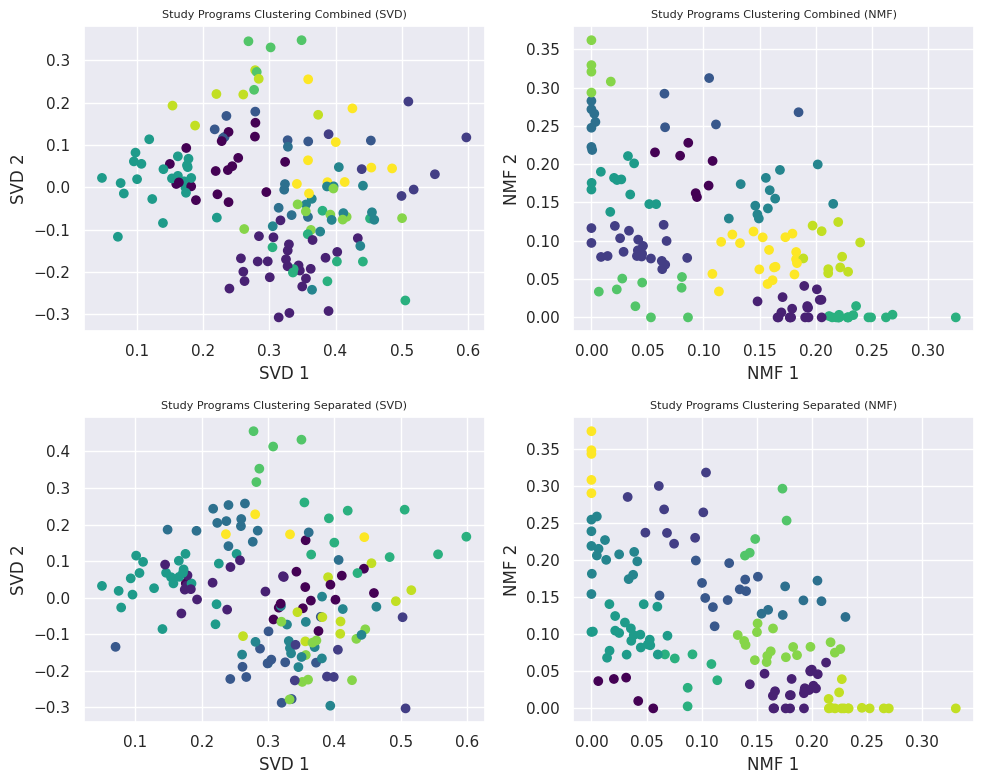

In [159]:
clustering_plot_matplotlib = ClusteringPlotMatplotlib(
    data_combined, titles_combined, xlabels_combined, ylabels_combined, clusters_combined, cmaps_combined, markers_combined
)
clustering_plot_matplotlib.plot()

In [160]:
# Building a dendogram to decide on the number of clusters
import scipy.cluster.hierarchy as shc

# Hierarchical clustering on SVD reduced matrix for study programs
linkage_matrix_svd_programs = shc.linkage(programs_matrix_svd, method='ward')
linkage_matrix_svd_skills = shc.linkage(skills_matrix_svd, method='ward')

# Hierarchical clustering on NMF reduced matrix for study programs
linkage_matrix_nmf_programs = shc.linkage(programs_matrix_nmf, method='ward')
linkage_matrix_nmf_skills = shc.linkage(skills_matrix_nmf, method='ward')

# Hierarchical clustering on SVD reduced matrix for separated study programs
linkage_matrix__svd_programs_separated = shc.linkage(program_matrix_svd_separated, method='ward')
linkage_matrix__svd_skills_separated = shc.linkage(skill_matrix_svd_separated, method='ward')

# Hierarchical clustering on NMF reduced matrix for separated study programs
linkage_matrix_nmf_programs_separated = shc.linkage(program_matrix_nmf_separated, method='ward')
linkage_matrix_nmf_skills_separated = shc.linkage(skill_matrix_nmf_separated, method='ward')

In [161]:
def plot_dendrograms(linkage_matrices, titles, xlabels, ylabels, axhline_ys=None):
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    axes = axes.flatten()  # Flatten the 2x2 array of axes for easy iteration

    for i, ax in enumerate(axes):
        dendrogram = shc.dendrogram(linkage_matrices[i], ax=ax)
        ax.set_title(titles[i])
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel(ylabels[i])
        if axhline_ys and axhline_ys[i]:
            ax.axhline(y=axhline_ys[i], color='r', linestyle='--')

    plt.tight_layout()
    plt.show()


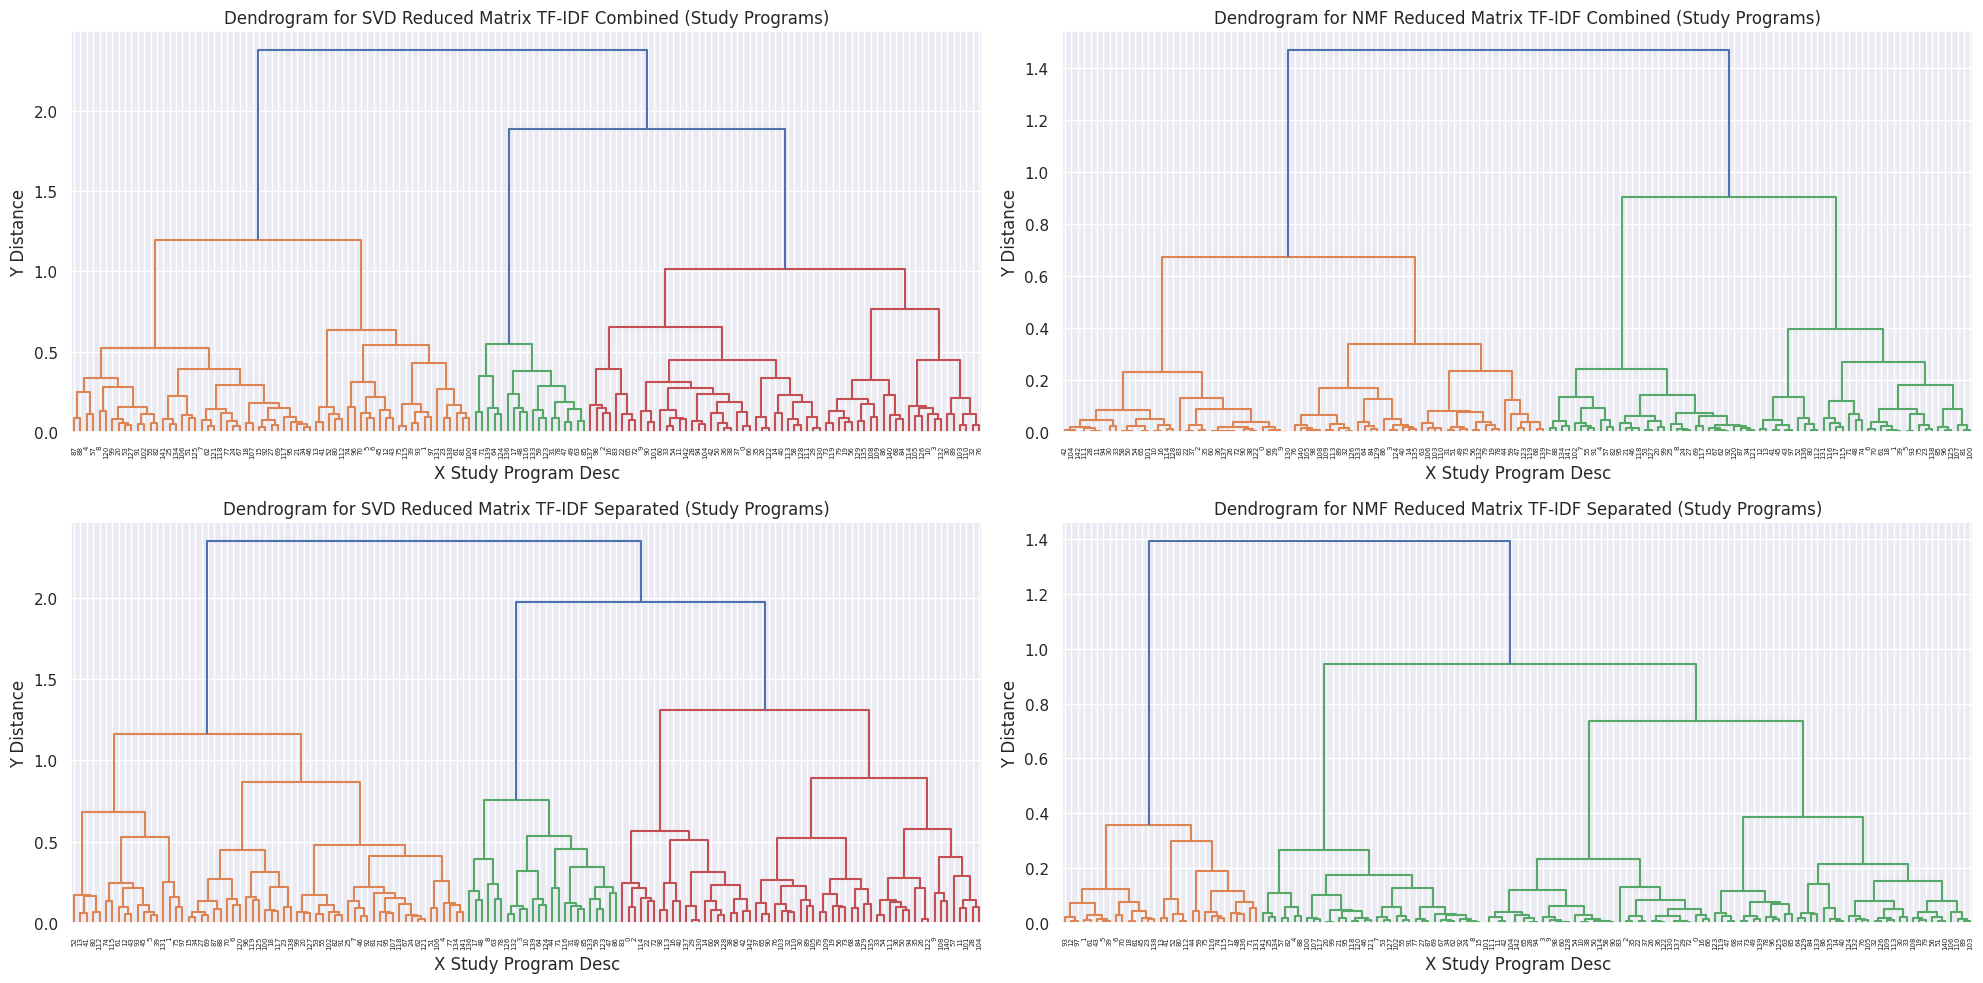

In [163]:
linkage_matrices = [linkage_matrix_svd_programs, linkage_matrix_nmf_programs, linkage_matrix__svd_programs_separated, linkage_matrix_nmf_programs_separated]
titles = ['Dendrogram for SVD Reduced Matrix TF-IDF Combined (Study Programs)', 'Dendrogram for NMF Reduced Matrix TF-IDF Combined (Study Programs)', 'Dendrogram for SVD Reduced Matrix TF-IDF Separated (Study Programs)', 'Dendrogram for NMF Reduced Matrix TF-IDF Separated (Study Programs)']
xlabels = ['X Study Program Desc', 'X Study Program Desc', 'X Study Program Desc', 'X Study Program Desc']
ylabels = ['Y Distance', 'Y Distance', 'Y Distance', 'Y Distance']
axhline_ys = [10, 15, 20, 25]  # Example y-values for horizontal lines

plot_dendrograms(linkage_matrices, titles, xlabels, ylabels, axhline_ys)

# Performance Metric

In [164]:
# For each study program, find the maximum similarity score with any skill set
max_similarity_scores_svd = np.max(similarity_matrix_svd, axis=1)
max_similarity_scores_nmf = np.max(similarity_matrix_nmf, axis=1)

max_similarity_scores_svd_separated = np.max(similarity_matrix_svd_separate, axis=1)
max_similarity_scores_nmf_separated = np.max(similarity_matrix_nmf_separate, axis=1)

In [181]:
# Define a threshold to consider a study program relevant to a skill set
threshold = 0.85

# Calculate the number of relevant study programs
num_relevant_study_programs_svd = np.sum(max_similarity_scores_svd >= threshold)
num_relevant_study_programs_nmf = np.sum(max_similarity_scores_nmf >= threshold)
num_relevant_study_programs_svd_separated = np.sum(max_similarity_scores_svd_separated >= threshold)
num_relevant_study_programs_nmf_separated = np.sum(max_similarity_scores_nmf_separated >= threshold)

# Calculate the number of non-relevant study programs
num_non_relevant_study_programs_svd = len(study_program) - num_relevant_study_programs_svd
num_non_relevant_study_programs_nmf = len(study_program) - num_relevant_study_programs_nmf
num_non_relevant_study_programs_svd_separated = len(study_program) - num_relevant_study_programs_svd_separated
num_non_relevant_study_programs_nmf_separated = len(study_program) - num_relevant_study_programs_nmf_separated

# Calculate totals
total_study_programs = len(study_program)
total_skill_sets = len(skillset)

In [182]:
import pandas as pd
from tabulate import tabulate

# Create a dictionary to store the values
summary_dict = {
    'Metric': [
        'Total Study Programs',
        'Total Skill Sets',
        f'Relevant Study Programs TF-IDF Combined (SVD) (>= {threshold})',
        f'Non-Relevant Study Programs TF-IDF Combined (SVD) (< {threshold})',
        f'Relevant Study Programs TF-IDF Combined (NMF) (>= {threshold})',
        f'Non-Relevant Study Programs TF-IDF Combined (NMF) (< {threshold})',
        f'Relevant Study Programs TF-IDF Separated (SVD) (>= {threshold})',
        f'Non-Relevant Study Programs TF-IDF Separated (SVD) (< {threshold})',
        f'Relevant Study Programs TF-IDF Separated (NMF) (>= {threshold})',
        f'Non-Relevant Study Programs TF-IDF Separated (NMF) (< {threshold})'
    ],
    'Value': [
        total_study_programs,
        total_skill_sets,
        num_relevant_study_programs_svd,
        num_non_relevant_study_programs_svd,
        num_relevant_study_programs_nmf,
        num_non_relevant_study_programs_nmf,
        num_relevant_study_programs_svd_separated,
        num_non_relevant_study_programs_svd_separated,
        num_relevant_study_programs_nmf_separated,
        num_non_relevant_study_programs_nmf_separated
    ]
}

# Convert the dictionary into a DataFrame
summary_df = pd.DataFrame(summary_dict)

# Display the DataFrame using tabulate for better readability
print(tabulate(summary_df, headers='keys', tablefmt='grid', showindex=False))

+-------------------------------------------------------------+---------+
| Metric                                                      |   Value |
+=============================================================+=========+
| Total Study Programs                                        |     143 |
+-------------------------------------------------------------+---------+
| Total Skill Sets                                            |      12 |
+-------------------------------------------------------------+---------+
| Relevant Study Programs TF-IDF Combined (SVD) (>= 0.85)     |       7 |
+-------------------------------------------------------------+---------+
| Non-Relevant Study Programs TF-IDF Combined (SVD) (< 0.85)  |     136 |
+-------------------------------------------------------------+---------+
| Relevant Study Programs TF-IDF Combined (NMF) (>= 0.85)     |      82 |
+-------------------------------------------------------------+---------+
| Non-Relevant Study Programs TF-IDF C

In [183]:
# For each study program, find the maximum similarity score with any skill set
max_similarity_scores_svd = np.max(similarity_matrix_svd, axis=1)
max_similarity_scores_nmf = np.max(similarity_matrix_nmf, axis=1)

max_similarity_scores_svd_separated = np.max(similarity_matrix_svd_separate, axis=1)
max_similarity_scores_nmf_separated = np.max(similarity_matrix_nmf_separate, axis=1)

In [184]:
# Precision, Recall, F1-Score for TF-IDF Combined SVD
TP_svd = num_relevant_study_programs_svd
FP_svd = num_non_relevant_study_programs_svd
FN_svd = 0  # Assuming no false negatives for this simplified context
TN_svd = 0  # Assuming no true negatives for this simplified context

precision_svd = TP_svd / (TP_svd + FP_svd)
recall_svd = TP_svd / (TP_svd + FN_svd)  # Here FN is 0, so recall is 1
f1_score_svd = 2 * (precision_svd * recall_svd) / (precision_svd + recall_svd)

# Precision, Recall, F1-Score for TF-IDF Combined NMF
TP_nmf = num_relevant_study_programs_nmf
FP_nmf = num_non_relevant_study_programs_nmf
FN_nmf = 0  # Assuming no false negatives for this simplified context
TN_nmf = 0  # Assuming no true negatives for this simplified context

precision_nmf = TP_nmf / (TP_nmf + FP_nmf)
recall_nmf = TP_nmf / (TP_nmf + FN_nmf)  # Here FN is 0, so recall is 1
f1_score_nmf = 2 * (precision_nmf * recall_nmf) / (precision_nmf + recall_nmf)

# Precision, Recall, F1-Score for TF-IDF Separated SVD
TP_svd_sp = num_relevant_study_programs_svd_separated
FP_svd_sp = num_non_relevant_study_programs_svd_separated
FN_svd_sp = 0  # Assuming no false negatives for this simplified context
TN_svd_sp = 0  # Assuming no true negatives for this simplified context

precision_svd_sp = TP_svd_sp / (TP_svd_sp + FP_svd_sp)
recall_svd_sp = TP_svd_sp / (TP_svd_sp + FN_svd_sp)  # Here FN is 0, so recall is 1
f1_score_svd_sp = 2 * (precision_svd_sp * recall_svd_sp) / (precision_svd_sp + recall_svd_sp)

# Precision, Recall, F1-Score for TF-IDF Separated NMF
TP_nmf_sp = num_relevant_study_programs_nmf_separated
FP_nmf_sp = num_non_relevant_study_programs_nmf_separated
FN_nmf_sp = 0  # Assuming no false negatives for this simplified context
TN_nmf_sp = 0  # Assuming no true negatives for this simplified context

precision_nmf_sp = TP_nmf_sp / (TP_nmf_sp + FP_nmf_sp)
recall_nmf_sp = TP_nmf_sp / (TP_nmf_sp + FN_nmf_sp)  # Here FN is 0, so recall is 1
f1_score_nmf_sp = 2 * (precision_nmf_sp * recall_nmf_sp) / (precision_nmf_sp + recall_nmf_sp)

In [190]:
# Create a dictionary to store the metrics
metrics_data = {
    'Metric': ['Precision', 'F1-Score'],
    'Combined TF-IDF (SVD)': [precision_svd, f1_score_svd],
    'Combined TF-IDF (NMF)': [precision_nmf, f1_score_nmf],
    'Separated TF-IDF (SVD)': [precision_svd_sp, f1_score_svd_sp],
    'Separated TF-IDF (NMF)': [precision_nmf_sp, f1_score_nmf_sp]
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics_data)
# Convert the numeric values to percentages
metrics_df.iloc[:, 1:] = metrics_df.iloc[:, 1:].applymap(lambda x: f"{x * 100:.2f}%")

metrics_df

,Metric,Combined TF-IDF (SVD),Combined TF-IDF (NMF),Separated TF-IDF (SVD),Separated TF-IDF (NMF)
0,Precision,4.90%,57.34%,82.52%,100.00%
1,F1-Score,9.33%,72.89%,90.42%,100.00%


### Display the similarity scores for each study program with names

In [191]:
# Find the most similar skill set for each study program
most_similar_skills_svd = np.argmax(similarity_matrix_svd, axis=1)
most_similar_skills_nmf = np.argmax(similarity_matrix_nmf, axis=1)
most_similar_skills_svd_separated = np.argmax(similarity_matrix_svd_separate, axis=1)
most_similar_skills_nmf_separated = np.argmax(similarity_matrix_nmf_separate, axis=1)

# Display the similarity scores for each study program with names
for i, program in enumerate(study_program_cleaned['study_program_name'][:5]):
    svd_score = similarity_matrix_svd[i, most_similar_skills_svd[i]]
    nmf_score = similarity_matrix_nmf[i, most_similar_skills_nmf[i]]
    svd_score_sp = similarity_matrix_svd_separate[i, most_similar_skills_svd_separated[i]]
    nmf_score_sp = similarity_matrix_nmf_separate[i, most_similar_skills_nmf_separated[i]]

    svd_relevance = "Relevant" if svd_score >= threshold else "Not Relevant"
    nmf_relevance = "Relevant" if nmf_score >= threshold else "Not Relevant"
    svd_relevance_sp = "Relevant" if svd_score_sp >= threshold else "Not Relevant"
    nmf_relevance_sp = "Relevant" if nmf_score_sp >= threshold else "Not Relevant"

    print(f"Program Name: {program}")
    print(f"Most similar skill set (Combined TF-IDF SVD): {skillset_cleaned['profile_title'][most_similar_skills_svd[i]]} - Similarity Score = {svd_score:.2f} - {svd_relevance}")
    print(f"Most similar skill set (Combined TF-IDF NMF): {skillset_cleaned['profile_title'][most_similar_skills_nmf[i]]} - Similarity Score = {nmf_score:.2f} - {nmf_relevance}")
    print(f"Most similar skill set (Separated TF-IDF SVD): {skillset_cleaned['profile_title'][most_similar_skills_svd_separated[i]]} - Similarity Score = {svd_score_sp:.2f} - {svd_relevance_sp}")
    print(f"Most similar skill set (Separated TF-IDF NMF): {skillset_cleaned['profile_title'][most_similar_skills_nmf_separated[i]]} - Similarity Score = {nmf_score_sp:.2f} - {nmf_relevance_sp}\n")

Program Name: Cybersecurity Engineering
Most similar skill set (Combined TF-IDF SVD): Cybersecurity Educator - Similarity Score = 0.56 - Not Relevant
Most similar skill set (Combined TF-IDF NMF): Cybersecurity Educator - Similarity Score = 0.53 - Not Relevant
Most similar skill set (Separated TF-IDF SVD): Cyber Incident Responder - Similarity Score = 0.89 - Relevant
Most similar skill set (Separated TF-IDF NMF): Cybersecurity Researcher - Similarity Score = 0.99 - Relevant

Program Name: Cyber Security Management
Most similar skill set (Combined TF-IDF SVD): Cyber Threat Intelligence Specialist - Similarity Score = 0.51 - Not Relevant
Most similar skill set (Combined TF-IDF NMF): Cyber Incident Responder - Similarity Score = 1.00 - Relevant
Most similar skill set (Separated TF-IDF SVD): Cybersecurity Architect - Similarity Score = 0.93 - Relevant
Most similar skill set (Separated TF-IDF NMF): Cyber Threat Intelligence Specialist - Similarity Score = 1.00 - Relevant

Program Name: Cyber

In [192]:
# Create a list to store the output
output = []

# Collect the data
for i, program in enumerate(study_program_cleaned['study_program_name']):
    svd_score = similarity_matrix_svd[i, most_similar_skills_svd[i]]
    nmf_score = similarity_matrix_nmf[i, most_similar_skills_nmf[i]]
    svd_score_sp = similarity_matrix_svd_separate[i, most_similar_skills_svd_separated[i]]
    nmf_score_sp = similarity_matrix_nmf_separate[i, most_similar_skills_nmf_separated[i]]

    svd_relevance = "Relevant" if svd_score >= threshold else "Not Relevant"
    nmf_relevance = "Relevant" if nmf_score >= threshold else "Not Relevant"
    svd_relevance_sp = "Relevant" if svd_score_sp >= threshold else "Not Relevant"
    nmf_relevance_sp = "Relevant" if nmf_score_sp >= threshold else "Not Relevant"

    output.append([
        program,
        skillset_cleaned['profile_title'][most_similar_skills_svd[i]], f"{svd_score:.2f}", svd_relevance,
        skillset_cleaned['profile_title'][most_similar_skills_nmf[i]], f"{nmf_score:.2f}", nmf_relevance,
        skillset_cleaned['profile_title'][most_similar_skills_svd_separated[i]], f"{svd_score_sp:.2f}", svd_relevance_sp,
        skillset_cleaned['profile_title'][most_similar_skills_nmf_separated[i]], f"{nmf_score_sp:.2f}", nmf_relevance_sp
    ])

# Create a DataFrame
columns = [
    'Program Name',
    'Most similar skill set (Combined TF-IDF SVD)', 'SVD Similarity Score', 'SVD Relevance',
    'Most similar skill set (Combined TF-IDF NMF)', 'NMF Similarity Score', 'NMF Relevance',
    'Most similar skill set (Separated TF-IDF SVD)', 'SVD Separated Similarity Score', 'SVD Separated Relevance',
    'Most similar skill set (Separated TF-IDF NMF)', 'NMF Separated Similarity Score', 'NMF Separated Relevance'
]
df_output = pd.DataFrame(output, columns=columns)


In [195]:
import plotly.graph_objects as go

# Create the table figure
fig = go.Figure(data=[go.Table(
    header=dict(values=df_output.columns,
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_output[col] for col in df_output.columns],
               fill_color='lavender',
               align='left'))
])

# Update layout for better readability
fig.update_layout(
    title="Most Similar Skill Sets for Each Study Program",
    width=1400,
    height=800
)

# Show the table
fig.show()

In [198]:
# Collect similarity scores
scores_data = {
    'Program': study_program_cleaned['study_program_name'],
    'SVD TF-IDF Combined': [similarity_matrix_svd[i, most_similar_skills_svd[i]] for i in range(len(study_program_cleaned))],
    'NMF TF-IDF Combined': [similarity_matrix_nmf[i, most_similar_skills_nmf[i]] for i in range(len(study_program_cleaned))],
    'SVD TF-IDF Separated': [similarity_matrix_svd_separate[i, most_similar_skills_svd_separated[i]] for i in range(len(study_program_cleaned))],
    'NMF TF-IDF Separated': [similarity_matrix_nmf_separate[i, most_similar_skills_nmf_separated[i]] for i in range(len(study_program_cleaned))]
}

# Convert to DataFrame
scores_df = pd.DataFrame(scores_data)

# Create histograms
fig_hist = make_subplots(rows=2, cols=2, subplot_titles=['SVD TF-IDF Combined', 'NMF TF-IDF Combined', 'SVD TF-IDF Separated', 'NMF TF-IDF Separated'], vertical_spacing=0.1, horizontal_spacing=0.1)

fig_hist.add_trace(go.Histogram(x=scores_df['SVD TF-IDF Combined'], name='SVD TF-IDF Combined', marker_color='blue'), row=1, col=1)
fig_hist.add_trace(go.Histogram(x=scores_df['NMF TF-IDF Combined'], name='NMF TF-IDF Combined', marker_color='green'), row=1, col=2)
fig_hist.add_trace(go.Histogram(x=scores_df['SVD TF-IDF Separated'], name='SVD TF-IDF Separated', marker_color='red'), row=2, col=1)
fig_hist.add_trace(go.Histogram(x=scores_df['NMF TF-IDF Separated'], name='NMF TF-IDF Separated', marker_color='orange'), row=2, col=2)

fig_hist.update_layout(title_text="Histograms of Similarity Scores", height=600, width=800)
fig_hist.show()

In [199]:
# Create box plots
fig_box = make_subplots(rows=2, cols=2, subplot_titles=['SVD TF-IDF Combined', 'NMF TF-IDF Combined', 'SVD TF-IDF Separated', 'NMF TF-IDF Separated'], vertical_spacing=0.1, horizontal_spacing=0.1)

fig_box.add_trace(go.Box(y=scores_df['SVD TF-IDF Combined'], name='SVD TF-IDF Combined', marker_color='blue'), row=1, col=1)
fig_box.add_trace(go.Box(y=scores_df['NMF TF-IDF Combined'], name='NMF TF-IDF Combined', marker_color='green'), row=1, col=2)
fig_box.add_trace(go.Box(y=scores_df['SVD TF-IDF Separated'], name='SVD TF-IDF Separated', marker_color='red'), row=2, col=1)
fig_box.add_trace(go.Box(y=scores_df['NMF TF-IDF Separated'], name='NMF TF-IDF Separated', marker_color='orange'), row=2, col=2)

fig_box.update_layout(title_text="Box Plots of Similarity Scores", height=600, width=800)
fig_box.show()

**---------------------------------------------------------------- FINISH LINE ------------------------------------------------------------------**

# THE CODE BELOW ARE JUST REFERENCE FOR OTHER PERFORMANCE METRIC (NOT USED FOR THIS STUDY CASE)

In [ ]:
# Calculate cosine similarity
similarity_matrix_svd = cosine_similarity(programs_matrix_svd, skills_matrix_svd)
similarity_matrix_nmf = cosine_similarity(programs_matrix_nmf, skills_matrix_nmf)

def calculate_similarity_metrics(similarity_matrix, clusters, skill_clusters):
    intra_cluster_sims = []
    inter_cluster_sims = []

    # Iterate over each pair of items
    for i in range(similarity_matrix.shape[0]):  # programs
        for j in range(similarity_matrix.shape[1]):  # skills
            if clusters[i] == skill_clusters[j]:
                intra_cluster_sims.append(similarity_matrix[i, j])
            else:
                inter_cluster_sims.append(similarity_matrix[i, j])

    # Calculate average similarities
    avg_intra_cluster_sim = np.mean(intra_cluster_sims)
    avg_inter_cluster_sim = np.mean(inter_cluster_sims)

    return avg_intra_cluster_sim, avg_inter_cluster_sim

# Calculate similarity metrics for SVD
avg_intra_cluster_sim_svd, avg_inter_cluster_sim_svd = calculate_similarity_metrics(similarity_matrix_svd, clusters_svd, skill_clusters_svd)

# Calculate similarity metrics for NMF
avg_intra_cluster_sim_nmf, avg_inter_cluster_sim_nmf = calculate_similarity_metrics(similarity_matrix_nmf, clusters_nmf, skill_clusters_nmf)

# Create a DataFrame to present the results
similarity_metrics_df = pd.DataFrame({
    'Metric': ['Average Intra-Cluster Similarity', 'Average Inter-Cluster Similarity'],
    'SVD': [avg_intra_cluster_sim_svd, avg_inter_cluster_sim_svd],
    'NMF': [avg_intra_cluster_sim_nmf, avg_inter_cluster_sim_nmf]
})

print(similarity_metrics_df)

                             Metric       SVD       NMF
0  Average Intra-Cluster Similarity  0.095785  0.993623
1  Average Inter-Cluster Similarity  0.065391  0.589458


In [ ]:
# Define the number of components to test
components = [2, 10, 50, 100, 150]

# Initialize lists to store results
svd_rmse = []
nmf_rmse = []

# Calculate reconstruction error for each number of components
for n in components:
    # SVD
    svd = TruncatedSVD(n_components=n, random_state=42)
    reduced_matrix_svd = svd.fit_transform(combined_text_tfidf)
    reconstructed_matrix_svd = svd.inverse_transform(reduced_matrix_svd)
    svd_error = np.sqrt(np.mean((combined_text_tfidf.toarray() - reconstructed_matrix_svd) ** 2))
    svd_rmse.append(svd_error)

    # NMF
    nmf = NMF(n_components=n, init='random', random_state=42)
    W = nmf.fit_transform(combined_text_tfidf)
    H = nmf.components_
    reconstructed_matrix_nmf = np.dot(W, H)
    nmf_error = np.sqrt(np.mean((combined_text_tfidf.toarray() - reconstructed_matrix_nmf) ** 2))
    nmf_rmse.append(nmf_error)

In [ ]:
# Find the optimal number of components based on the second derivative (curvature) of the error curve
optimal_n_components_svd_rmse = components[np.argmin(svd_rmse)]
optimal_n_components_nmf_rmse = components[np.argmin(nmf_rmse)]

# Calculate cumulative explained variance for SVD
svd = TruncatedSVD(n_components=components[-1], random_state=42)
svd.fit(combined_text_tfidf)
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

# Choose the number of components that explain a desired threshold of variance (e.g., 95%)
optimal_n_components_svd_variance = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Optimal number of components for SVD (RMSE Method): {optimal_n_components_svd_rmse}")
print(f"Optimal number of components for NMF (RMSE Method): {optimal_n_components_nmf_rmse}")
print(f"Optimal number of components for SVD (Variance Method): {optimal_n_components_svd_variance}")

Optimal number of components for SVD (RMSE Method): 150
Optimal number of components for NMF (RMSE Method): 150
Optimal number of components for SVD (Variance Method): 134


In [ ]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'n_components': list(components),
    'SVD_RSME': svd_rmse,
    'NMF_RSME': nmf_rmse,
    'SVD_cumulative_variance': cumulative_variance[:len(components)]
})

results_df

,n_components,SVD_RSME,NMF_RSME,SVD_cumulative_variance
0,2,0.024354,0.024373,0.012907
1,10,0.022587,0.022843,0.038986
2,50,0.016797,0.018115,0.060920
3,100,0.010454,0.012378,0.082026
4,150,0.002090,0.003619,0.099218


In [ ]:
# Calculate clustering performance metrics
metrics_svd = {
    "Silhouette Score": silhouette_score(programs_matrix_svd, clusters_svd),
    "Calinski-Harabasz Index": calinski_harabasz_score(programs_matrix_svd, clusters_svd),
    "Davies-Bouldin Index": davies_bouldin_score(programs_matrix_svd, clusters_svd)
}

metrics_nmf = {
    "Silhouette Score": silhouette_score(programs_matrix_nmf, clusters_nmf),
    "Calinski-Harabasz Index": calinski_harabasz_score(programs_matrix_nmf, clusters_nmf),
    "Davies-Bouldin Index": davies_bouldin_score(programs_matrix_nmf, clusters_nmf)
}

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame([metrics_svd, metrics_nmf], index=['SVD', 'NMF'])
print(metrics_df)

     Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index
SVD         -0.002795                 1.655399              3.851608
NMF          0.384292               189.114771              0.821207


In [ ]:
matches = []
for cluster in range(12):
    programs_in_cluster = df_programs_svd[df_programs_svd['Cluster'] == cluster]['Program'].tolist()
    profiles_in_cluster = skillset_cleaned[skillset_cleaned['profile_title'] == cluster_names[cluster]]['profile_title'].tolist()
    for program in programs_in_cluster:
        # for profile in profiles_in_cluster:
        matches.append({'Cluster': cluster_names[cluster], 'Program': program})

matches_df = pd.DataFrame(matches)
matches_df

,Cluster,Program
0,Chief Information Security Officer (CISO),Master's Degree in Computer Security and Artif...
1,Chief Information Security Officer (CISO),IT Security
2,Chief Information Security Officer (CISO),Master's Degree in Cybersecurity and Data Inte...
3,Chief Information Security Officer (CISO),Master's Degree in Computer Security and Artif...
4,Cyber Incident Responder,Master Degree in Cybersecurity
...,...,...
138,Penetration Tester,Information Security
139,Penetration Tester,Master of Electrical Engineering (ICT Security...
140,Penetration Tester,System and Network Security
141,Penetration Tester,MSc in Information and Communication Systems S...


In [ ]:
import numpy as np

def find_best_match(cluster_labels_programs, cluster_labels_skills, similarity_matrix):
    best_matches = []
    for cluster_label in np.unique(cluster_labels_programs):
        # Get indices of study programs and skill sets in the same cluster
        program_indices = np.where(cluster_labels_programs == cluster_label)[0]
        skill_indices = np.where(cluster_labels_skills == cluster_label)[0]

        if skill_indices.size > 0:
            for program_idx in program_indices:
                # Get similarity scores for the current program with all skills in the same cluster
                similarity_scores = similarity_matrix[program_idx, skill_indices]
                best_skill_idx = skill_indices[np.argmax(similarity_scores)]
                best_matches.append((program_idx, best_skill_idx))
    return best_matches

# Find best matches for SVD
best_matches_svd = find_best_match(clusters_svd, skill_clusters_svd, similarity_matrix_svd)

# Find best matches for NMF
best_matches_nmf = find_best_match(clusters_nmf, skill_clusters_nmf, similarity_matrix_nmf)

# Print the results
for i, (program_idx, skill_idx) in enumerate(best_matches_svd):
    print(f"Best match (SVD) for Program '{study_program_cleaned['study_program_name'][program_idx]}' is Skill '{skillset_cleaned['profile_title'][skill_idx]}'")

for i, (program_idx, skill_idx) in enumerate(best_matches_nmf):
    print(f"Best match (NMF) for Program '{study_program_cleaned['study_program_name'][program_idx]}' is Skill '{skillset_cleaned['profile_title'][skill_idx]}'")

Best match (SVD) for Program 'Master Degree in Cybersecurity' is Skill 'Cyber Threat Intelligence Specialist'
Best match (SVD) for Program 'Master of Science in Cybersecurity' is Skill 'Cyber Threat Intelligence Specialist'
Best match (SVD) for Program 'Digital Technologies and Information Security' is Skill 'Cyber Threat Intelligence Specialist'
Best match (SVD) for Program 'Master in Cyberintelligence' is Skill 'Cyber Threat Intelligence Specialist'
Best match (SVD) for Program 'Cybersecurity' is Skill 'Cyber Threat Intelligence Specialist'
Best match (SVD) for Program 'Diplomatic, International and Global Security Studies' is Skill 'Cyber Threat Intelligence Specialist'
Best match (SVD) for Program 'Bachelor of Applied Computer Science - Cyber Security Professional' is Skill 'Cyber Threat Intelligence Specialist'
Best match (SVD) for Program 'Artificial Intelligence & Cybersecurity' is Skill 'Cyber Threat Intelligence Specialist'
Best match (SVD) for Program 'Master of High Speciali

In [ ]:
from sklearn.metrics import confusion_matrix
# Create a DataFrame for skill sets with clusters
df_skills_svd = pd.DataFrame({
    'Profile': skillset_cleaned['profile_title'],
    'SVD1': skills_matrix_svd[:, 0],
    'SVD2': skills_matrix_svd[:, 1],
    'Cluster': skill_clusters_svd
})

# Calculate the most similar profile for each program
program_to_profile = {}
for i, program in enumerate(df_programs_svd['Program']):
    # Get the most similar profile index
    most_similar_profile_idx = np.argmax(similarity_matrix_svd[i])
    most_similar_profile = df_skills_svd.iloc[most_similar_profile_idx]['Profile']
    program_to_profile[program] = most_similar_profile

# Create lists for true labels and predicted labels
true_labels = []
pred_labels = []
for program, predicted_profile in program_to_profile.items():
    true_labels.append(program)
    pred_labels.append(predicted_profile)

# Generate the confusion matrix
labels = list(study_program_cleaned['study_program_name'].unique()) + list(skillset_cleaned['profile_title'].unique())
conf_matrix = confusion_matrix(true_labels, pred_labels, labels=labels)


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, pred_labels, average='weighted')
f1 = f1_score(true_labels, pred_labels, average='weighted')

# Print precision, recall, and F1-score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.0
Recall: 0.0
F1-Score: 0.0


In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import f1_score
from scipy.optimize import linear_sum_assignment

# Generate pseudo-ground truth using a reference clustering (e.g., K-means on SVD)
pseudo_ground_truth = clusters_svd

# Compute contingency matrix between NMF clusters and pseudo-ground truth
contingency_matrix = pd.crosstab(clusters_nmf, pseudo_ground_truth)

# Compute precision and recall for each cluster
def compute_precision_recall(contingency_matrix):
    precision = np.zeros(contingency_matrix.shape[0])
    recall = np.zeros(contingency_matrix.shape[0])
    f1_scores = np.zeros(contingency_matrix.shape[0])
    for i in range(contingency_matrix.shape[0]):
        precision[i] = contingency_matrix.iloc[i].max() / contingency_matrix.iloc[i].sum()
        recall[i] = contingency_matrix.iloc[i].max() / contingency_matrix.max(axis=0).sum()
        if precision[i] + recall[i] > 0:
            f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
        else:
            f1_scores[i] = 0
    return precision, recall, f1_scores

precision, recall, f1_scores = compute_precision_recall(contingency_matrix)
f1_score_macro = np.mean(f1_scores)
f1_score_micro = f1_score(pseudo_ground_truth, clusters_nmf, average='micro')

# Print F-measure results
print("Precision (per cluster):", precision)
print("Recall (per cluster):", recall)
print("F1 Scores (per cluster):", f1_scores)
print("Macro F1 Score:", f1_score_macro)
print("Micro F1 Score:", f1_score_micro)

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_scores
}, index=[f'Cluster {i}' for i in range(len(precision))])
print(metrics_df)

Precision (per cluster): [0.28571429 0.57894737 0.38095238 0.4        0.42857143 0.5
 0.33333333 0.52941176 0.44444444 0.8        0.4        0.63157895]
Recall (per cluster): [0.04761905 0.26190476 0.19047619 0.04761905 0.07142857 0.14285714
 0.0952381  0.21428571 0.0952381  0.0952381  0.0952381  0.28571429]
F1 Scores (per cluster): [0.08163265 0.36065574 0.25396825 0.08510638 0.12244898 0.22222222
 0.14814815 0.30508475 0.15686275 0.17021277 0.15384615 0.39344262]
Macro F1 Score: 0.2044692842742082
Micro F1 Score: 0.06293706293706294
            Precision    Recall  F1 Score
Cluster 0    0.285714  0.047619  0.081633
Cluster 1    0.578947  0.261905  0.360656
Cluster 2    0.380952  0.190476  0.253968
Cluster 3    0.400000  0.047619  0.085106
Cluster 4    0.428571  0.071429  0.122449
Cluster 5    0.500000  0.142857  0.222222
Cluster 6    0.333333  0.095238  0.148148
Cluster 7    0.529412  0.214286  0.305085
Cluster 8    0.444444  0.095238  0.156863
Cluster 9    0.800000  0.095238  0.1702

In [ ]:
# Calculate clustering performance metrics
metrics_svd = {
    "Silhouette Score": silhouette_score(programs_matrix_svd, clusters_svd),
    "Calinski-Harabasz Index": calinski_harabasz_score(programs_matrix_svd, clusters_svd),
    "Davies-Bouldin Index": davies_bouldin_score(programs_matrix_svd, clusters_svd)
}

metrics_nmf = {
    "Silhouette Score": silhouette_score(programs_matrix_nmf, clusters_nmf),
    "Calinski-Harabasz Index": calinski_harabasz_score(programs_matrix_nmf, clusters_nmf),
    "Davies-Bouldin Index": davies_bouldin_score(programs_matrix_nmf, clusters_nmf)
}

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame([metrics_svd, metrics_nmf], index=['SVD', 'NMF'])
print(metrics_df)

     Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index
SVD         -0.002795                 1.655399              3.851608
NMF          0.384292               189.114771              0.821207


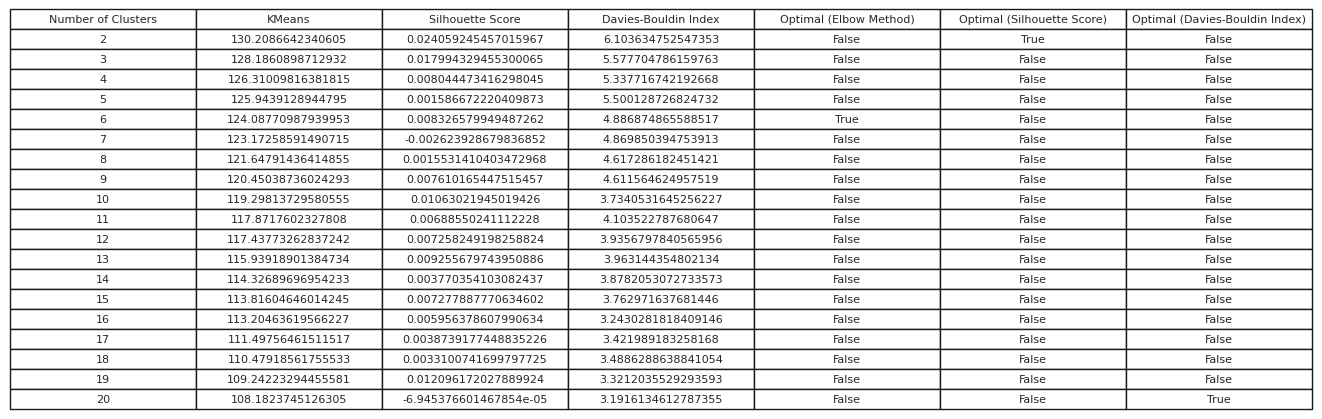

In [ ]:
# Initialize lists
wcss = []
silhouette_scores = []
db_indices = []
cluster_range = range(2, 21)

# Compute metrics for different number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_matrix_svd)  # Use reduced_matrix_nmf or reduced_matrix_svd

    # Append WCSS
    wcss.append(kmeans.inertia_)

    # Append silhouette score
    silhouette_scores.append(silhouette_score(reduced_matrix_svd, cluster_labels))

    # Append Davies-Bouldin index
    db_indices.append(davies_bouldin_score(reduced_matrix_svd, cluster_labels))

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Number of Clusters': cluster_range,
    'KMeans': wcss,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': db_indices
})

# Identify the optimal number of clusters
optimal_n_clusters_elbow = cluster_range[np.argmin(np.diff(np.diff(wcss))) + 2]
optimal_n_clusters_silhouette = cluster_range[np.argmax(silhouette_scores)]
optimal_n_clusters_db = cluster_range[np.argmin(db_indices)]

# Add optimal values to the DataFrame
metrics_df['Optimal (Elbow Method)'] = metrics_df['Number of Clusters'] == optimal_n_clusters_elbow
metrics_df['Optimal (Silhouette Score)'] = metrics_df['Number of Clusters'] == optimal_n_clusters_silhouette
metrics_df['Optimal (Davies-Bouldin Index)'] = metrics_df['Number of Clusters'] == optimal_n_clusters_db

# Display the DataFrame
# print(metrics_df)

# Optionally, save the DataFrame to a CSV file
metrics_df.to_csv('clustering_metrics.csv', index=False)

# If you want to display the metrics as a table in the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)
plt.show()

In [ ]:
# Calculate the most similar profile for each program
program_to_profile = {}
for i, program in enumerate(df_programs_svd['Program']):
    # Get the most similar profile index
    most_similar_profile_idx = np.argmax(similarity_matrix_svd[i])
    most_similar_profile = df_skills_svd.iloc[most_similar_profile_idx]['Profile']
    program_to_profile[program] = most_similar_profile

# Create a confusion matrix
true_labels = []
pred_labels = []
for program, predicted_profile in program_to_profile.items():
    true_labels.append(program)
    pred_labels.append(predicted_profile)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels, labels=study_program['study_program_name'].unique())

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=study_program['study_program_name'].unique(), yticklabels=study_program['study_program_name'].unique())
plt.xlabel('Predicted Profile')
plt.ylabel('True Program')
plt.title('Confusion Matrix - Similarity Results')
plt.show()

In [ ]:
# Dimensionality Reduction using LSA
lsa = TruncatedSVD(n_components=100)
program_lsa = lsa.fit_transform(program_tfidf)
skill_lsa = lsa.transform(skill_tfidf)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(program_lsa, skill_lsa)

# Create a DataFrame to display the results
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=study_program['study_program_name'],
    columns=skillset['profile_title']
)

similarity_df

profile_title,Chief Information Security Officer (CISO),Cyber Incident Responder,"Cyber Legal, Policy & Compliance Officer",Cyber Threat Intelligence Specialist,Cybersecurity Architect,Cybersecurity Auditor,Cybersecurity Educator,Cybersecurity Implementer,Cybersecurity Researcher,Cybersecurity Risk Manager,Digital Forensics Investigator,Penetration Tester
study_program_name,,,,,,,,,,,,
Cybersecurity Engineering,0.257521,0.257521,0.257521,0.257521,0.257521,0.257521,0.257521,0.257521,0.257521,0.257521,0.257521,0.257521
Cyber Security Management,0.151235,0.151235,0.151235,0.151235,0.151235,0.151235,0.151235,0.151235,0.151235,0.151235,0.151235,0.151235
Cybersecurity specialisation for Computer Science & Engineering Masters degree,0.383723,0.383723,0.383723,0.383723,0.383723,0.383723,0.383723,0.383723,0.383723,0.383723,0.383723,0.383723
MSc in Cybersecurity,0.437170,0.437170,0.437170,0.437170,0.437170,0.437170,0.437170,0.437170,0.437170,0.437170,0.437170,0.437170
High Specialization Master in Forensic Computing and Cybercrime,0.075420,0.075420,0.075420,0.075420,0.075420,0.075420,0.075420,0.075420,0.075420,0.075420,0.075420,0.075420
...,...,...,...,...,...,...,...,...,...,...,...,...
Computer Engineering and Science for Cybersecurity,0.278028,0.278028,0.278028,0.278028,0.278028,0.278028,0.278028,0.278028,0.278028,0.278028,0.278028,0.278028
Master of Science in Cyber Risk Strategy and Governance,0.425092,0.425092,0.425092,0.425092,0.425092,0.425092,0.425092,0.425092,0.425092,0.425092,0.425092,0.425092
"Cyber Security, Master of Science in Technology",0.192938,0.192938,0.192938,0.192938,0.192938,0.192938,0.192938,0.192938,0.192938,0.192938,0.192938,0.192938


In [ ]:
results_kmean_300 = {}

for i in range(2, 100):
    kmeans = DBSCAN(eps=0.8, min_samples=7, metric="cosine", algorithm="brute")
    labels= kmeans.fit_predict(tsvd_matrix)
    silhouette_value = silhouette_score(tsvd_matrix, labels)
    results_kmean_300[i] = silhouette_value

In [ ]:
clusters_count = max(results_kmean_300, key=results_kmean_300.get)
clusters_count

2

In [ ]:
def visualize_clusters(X, y, clusters_count, figsize=(10,5), title=None, show_palette=True, font_scale=1.5):
    tsne = TSNE(n_components=2, verbose=0, random_state=42)
    z = tsne.fit_transform(X)

    tsne_df = pd.DataFrame()
    tsne_df["y"] = y
    tsne_df["comp-1"] = z[:,0]
    tsne_df["comp-2"] = z[:,1]

    plt.figure(figsize=figsize)

    sns.set(font_scale=font_scale)

    if show_palette:
        sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                    palette=sns.color_palette("hls", clusters_count),
                    data=tsne_df).set(title=title)
    else:
         sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                    data=tsne_df).set(title=title)

    plt.legend(loc='upper right', title='Clusters')

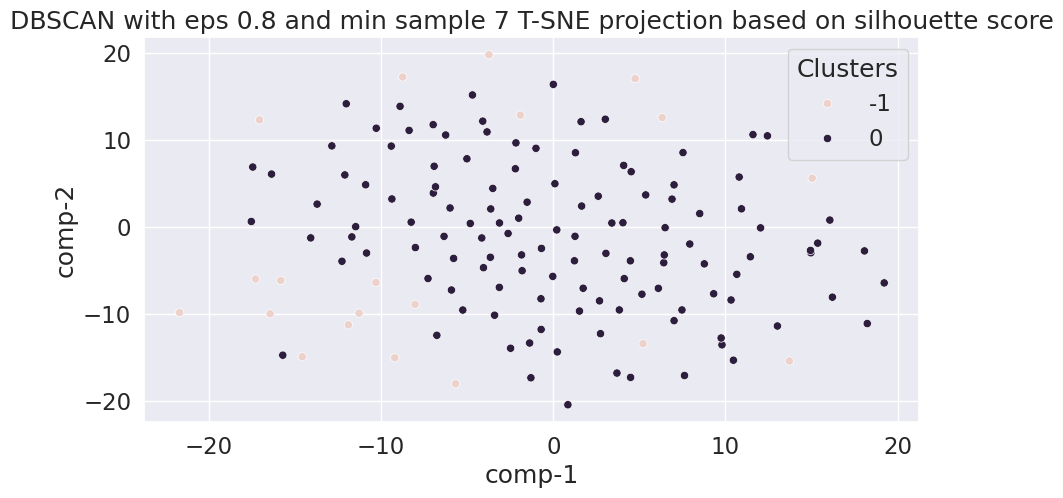

In [ ]:
title = "DBSCAN with eps 0.8 and min sample 7 T-SNE projection based on silhouette score"

visualize_clusters(tsvd_matrix, dbscan_clusters, clusters_count, title=title, show_palette=False)

In [ ]:
X_tfidf.shape

(143, 1243)

In [ ]:
data.shape

(143, 11)

In [ ]:
# Create a dataframe with tf-idf
X_df = pd.DataFrame(X_tfidf,
             columns=vectorizer.get_feature_names_out(),
             index=["item_{}".format(x) for x in range(data.shape[0])] )

X_df.head()

ValueError: Shape of passed values is (143, 1), indices imply (143, 1243)

In [ ]:
# Clustering on documents with DBSCAN
clustering = DBSCAN(eps=0.8, min_samples=7, metric="cosine", algorithm="brute")

# Fit on data
#No need to normalize data, it already is due to TF-IDF
clustering.fit(X)

# Write cluster ids into corpus and X_df
data['cluster_id'] = clustering.labels_
display(corpus.head())
X_df['cluster_id'] = clustering.labels_
display(X_df.head())

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
output_eps = []

for ms in range(2,100,2):
        label = AgglomerativeClustering(n_clusters=ms, affinity='cosine', linkage='complete').fit(x_pca).labels_
        score = silhouette_score(x_pca, labels)
        # print(round(ms,4), round(score,4))
        output_eps.append((ms, score))

# Get the parameters for best silhouette score
min_samples, score = sorted(output_eps, key=lambda x:x[-1])[-1]
print("DBSCAN model with LSA on TF-IDF vector")
print(f"Best silhouette_score: {round(score, 3)}")
print(f"min_samples: {min_samples}")

print(f"\nHyperparameters optimization done in {time() - t0:.3f} s")

DBSCAN model with LSA on TF-IDF vector
Best silhouette_score: 0.013
min_samples: 98

Hyperparameters optimization done in 75.157 s


In [ ]:
results_agglo = {}

for i in range(2,20):
    agglo = AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=i)
    labels = agglo.fit_predict(X_tfidf.toarray())
    silhouette_value = silhouette_score(X_tfidf, labels)
    results_agglo[i] = silhouette_value

In [ ]:
clusters_count = max(results_agglo, key=results_agglo.get)
clusters_count

17

In [ ]:
agg_clustring = AgglomerativeClustering(n_clusters=17, affinity='cosine', linkage='complete')
agg_clustring = agg_clustring.fit_predict(X_tfidf.toarray())
agg_silhouette = silhouette_score(X_tfidf, agg_clustring)
print(f'silhouette score = {agg_silhouette}')

silhouette score = 0.012567134118846381


In [ ]:
max_score = max(results_agglo)
print(f"Optimal number of clusters - {silhouette.index(max_score)*5+5} with silhouette score value: {round(max_score, 4)}")

In [ ]:
agg_silhouette_score_300 = silhouette_score(X_tfidf, results_agglo)
print(f'silhouette score = {agg_silhouette_score_300}')

In [ ]:
results_gm = {}

for i in range(2,20):
    gm = GaussianMixture(n_components=i, random_state=42)
    labels = gm.fit_predict(X_tfidf.toarray())
    silhouette_value = silhouette_score(X_tfidf, labels)
    results_gm[i] = silhouette_value

In [ ]:
clusters_count = max(results_gm, key=results_gm.get)
clusters_count

2

In [ ]:
distance = pairwise_distances(X_tfidf, metric='cosine')
hdbscan_clustering = hdbscan.HDBSCAN(gen_min_span_tree=True, metric='precomputed')
hdbscan_clustring_silhouette_tfidf = hdbscan_clustering.fit_predict(distance.astype('float64'))
hdbscan_clustring_silhouette_tfidf[:5]

array([-1, -1, -1, -1, -1])

In [ ]:
clusters_count = len(set(hdbscan_clustring_silhouette_tfidf))
clusters_count

1

In [ ]:
distance = pairwise_distances(tsvd_matrix, metric='cosine')
hdbscan_clustering = hdbscan.HDBSCAN(gen_min_span_tree=True, metric='precomputed')
hdbscan_clustring_silhouette_tsvd = hdbscan_clustering.fit_predict(distance.astype('float64'))
hdbscan_clustring_silhouette_tsvd[:5]

array([-1, -1, -1, -1, -1])

In [ ]:
clusters_count = len(set(hdbscan_clustring_silhouette_tsvd))
clusters_count

1

In [ ]:
distance = pairwise_distances(x_pca, metric='cosine')
hdbscan_clustering = hdbscan.HDBSCAN(gen_min_span_tree=True, metric='precomputed')
hdbscan_clustring_silhouette_pca = hdbscan_clustering.fit_predict(distance.astype('float64'))
hdbscan_clustring_silhouette_pca[:5]

array([-1, -1, -1, -1, -1])

In [ ]:
clusters_count = len(set(hdbscan_clustring_silhouette_tsvd))
clusters_count

1

In [ ]:
X_tfidf.shape

(143, 1243)

In [ ]:
results_agg_300 = {}

for i in range(2, X_tfidf.shape[0]):
    agg_clustring = AgglomerativeClustering(n_clusters=i, affinity='cosine', linkage='complete')
    labels = agg_clustring.fit_predict(X_tfidf.toarray())
    silhouette_value = silhouette_score(X_tfidf, labels)
    results_agg_300[i] = silhouette_value

In [ ]:
clusters_count = max(results_agg_300, key=results_agg_300.get)
clusters_count

88

In [ ]:
agg_clustring = AgglomerativeClustering(n_clusters=clusters_count, affinity='cosine', linkage='complete')
y_agg_clustring_300 = agg_clustring.fit_predict(X_tfidf.toarray())
y_agg_clustring_300[:5]

array([38, 57, 32,  9, 58])

In [ ]:
agg_silhouette_score_300 = silhouette_score(X_tfidf, y_agg_clustring_300)
print(f'silhouette score = {agg_silhouette_score_300}')

silhouette score = 0.047527388096996


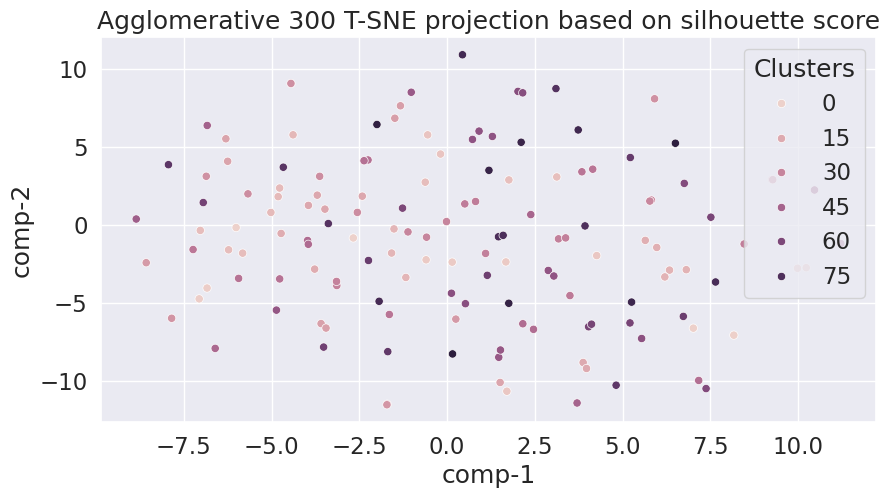

In [ ]:
title = "Agglomerative 300 T-SNE projection based on silhouette score"

visualize_clusters(X_tfidf.toarray(), y_agg_clustring_300, clusters_count, title=title, show_palette=False)